In [5]:
import pandas as pd
import numpy as np

from sklearn.impute import SimpleImputer

import warnings
warnings.filterwarnings("ignore")

In [6]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Load the dataset
df = pd.read_csv('D:\\flight delay\\flight_delay\\final_data.csv', low_memory=False)




# Encoding String Values to Float
# Convert object columns to string type
for column in df.select_dtypes(include=['object']).columns:
    df[column] = df[column].astype(str)

# Apply LabelEncoder
label_encoder = LabelEncoder()
for column in df.select_dtypes(include=['object']).columns:
    try:
        df[column] = label_encoder.fit_transform(df[column])
    except Exception as e:
        print(f"Error encoding column {column}: {e}")

# Correlation Matrix after encoding
correlation_matrix_encoded = df.corr()
print(correlation_matrix_encoded)


                         YEAR   QUARTER     MONTH  DAY_OF_MONTH  DAY_OF_WEEK  \
YEAR                 1.000000 -0.000942 -0.928984     -0.000765    -0.000864   
QUARTER             -0.000942  1.000000  0.360264      0.004844     0.007498   
MONTH               -0.928984  0.360264  1.000000      0.002168     0.000969   
DAY_OF_MONTH        -0.000765  0.004844  0.002168      1.000000     0.000461   
DAY_OF_WEEK         -0.000864  0.007498  0.000969      0.000461     1.000000   
...                       ...       ...       ...           ...          ...   
LATE_AIRCRAFT_DELAY       NaN  0.008457  0.008474     -0.005742     0.005510   
FIRST_DEP_TIME            NaN  0.010498  0.008745     -0.014338     0.001710   
TOTAL_ADD_GTIME           NaN  0.005990  0.000644     -0.043248    -0.008771   
LONGEST_ADD_GTIME         NaN  0.006536  0.000789     -0.043421    -0.009420   
Unnamed: 64               NaN       NaN       NaN           NaN          NaN   

                      FL_DATE  UNIQUE_C

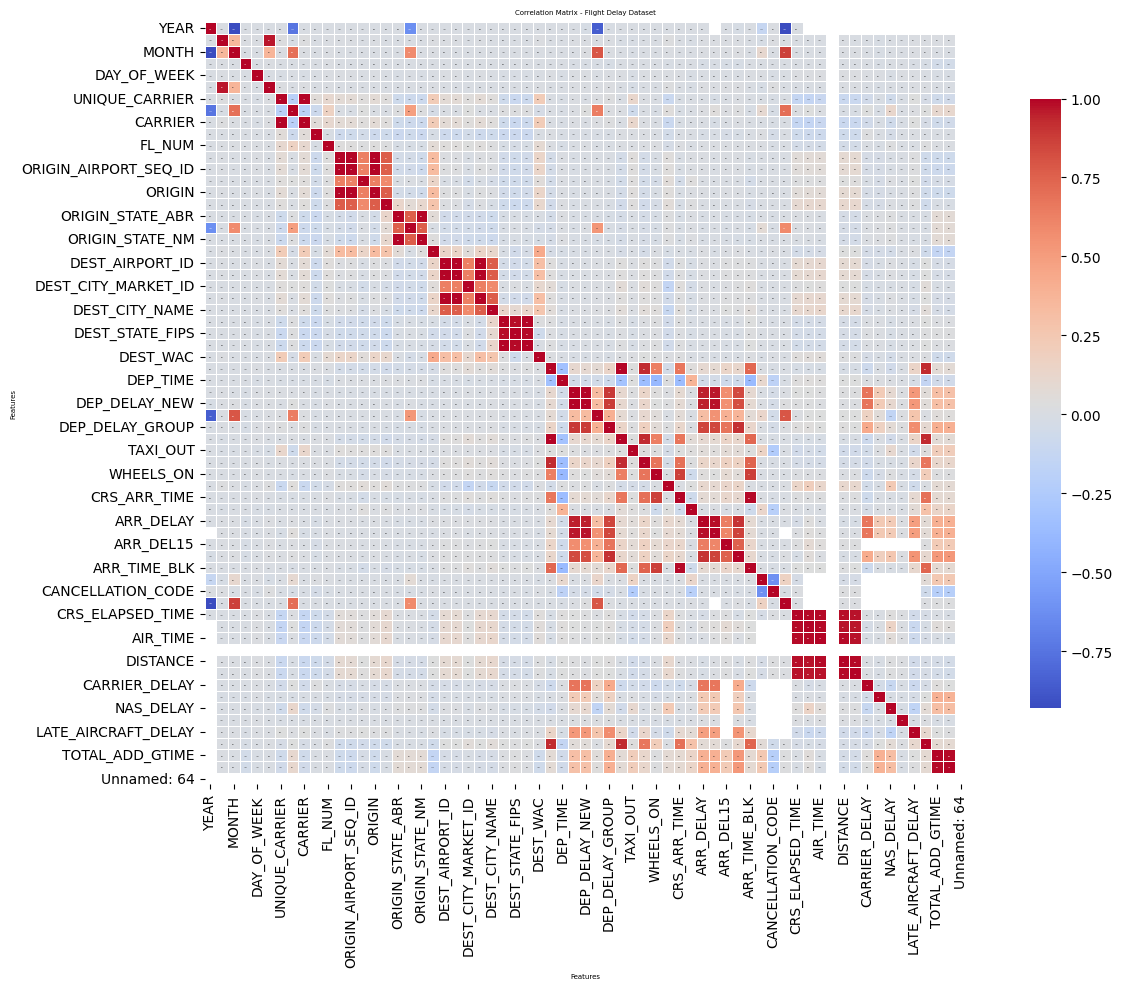

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have already computed the correlation matrix
correlation_matrix_encoded = df.corr()

# Create a larger heatmap using seaborn
plt.figure(figsize=(14, 10))  # Increase the figure size

# Customize the heatmap using seaborn
sns.heatmap(correlation_matrix_encoded, 
            annot=True,  # Show the correlation values in the heatmap
            cmap='coolwarm',  # Use the 'coolwarm' colormap
            fmt=".2f",  # Format of the annotations to two decimal places
            linewidths=0.5,  # Width of the lines separating each cell
            square=True,  # Ensure the cells are square
            cbar_kws={"shrink": 0.8},  # Adjust the size of the color bar
            annot_kws={"size": 1})  # Reduce the font size of annotations

# Set the title and labels
plt.title('Correlation Matrix - Flight Delay Dataset', fontsize=5)  # Increase title font size
plt.xlabel('Features', fontsize=5)  # Increase x-axis label font size
plt.ylabel('Features', fontsize=5)  # Increase y-axis label font size

# Adjust the layout to prevent clipping of labels
plt.tight_layout()

# Show the plot
plt.show()


In [8]:
pd.set_option('display.max_columns',None)

use_cols = ['YEAR','MONTH', 'DAY_OF_MONTH', 'DAY_OF_WEEK', 
            'DEP_TIME', 'CRS_DEP_TIME', 'ARR_TIME','CRS_ARR_TIME',
            'UNIQUE_CARRIER','FL_NUM','TAIL_NUM','ACTUAL_ELAPSED_TIME',
            'CRS_ELAPSED_TIME','AIR_TIME','ARR_DELAY','DEP_DELAY',
            'ORIGIN','DEST','DISTANCE','TAXI_IN','TAXI_OUT','CANCELLED',
            'CANCELLATION_CODE','DIVERTED','CARRIER_DELAY',
            'WEATHER_DELAY','NAS_DELAY','SECURITY_DELAY',
            'LATE_AIRCRAFT_DELAY'
]

df = pd.read_csv('D:\\flight delay\\flight_delay\\final_data.csv', usecols=use_cols).sample(300000, random_state=44)
df = df[df["MONTH"].isin([9,10,11,12])]
df.head()




,YEAR,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,UNIQUE_CARRIER,TAIL_NUM,FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,TAXI_IN,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,CANCELLED,CANCELLATION_CODE,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY
3967694,2016,9,26,1,OO,N863AS,3113,ORD,MKE,850.0,844.0,-6.0,13.0,5.0,937.0,924.0,-13.0,0.0,NaN,0.0,47.0,40.0,22.0,67.0,NaN,NaN,NaN,NaN,NaN
4541012,2016,10,9,7,AA,N956AA,2121,BOS,LGA,1100.0,1051.0,-9.0,11.0,9.0,1215.0,1204.0,-11.0,0.0,NaN,0.0,75.0,73.0,53.0,184.0,NaN,NaN,NaN,NaN,NaN
4027390,2016,9,29,4,OO,N423SW,3036,GJT,PHX,1815.0,1805.0,-10.0,12.0,22.0,1906.0,1857.0,-9.0,0.0,NaN,0.0,111.0,112.0,78.0,438.0,NaN,NaN,NaN,NaN,NaN
5497445,2016,12,13,2,UA,N17719,1965,MCO,EWR,1151.0,1146.0,-5.0,11.0,33.0,1430.0,1423.0,-7.0,0.0,NaN,0.0,159.0,157.0,113.0,937.0,NaN,NaN,NaN,NaN,NaN
4519037,2016,10,4,2,AA,N3MCAA,1314,TUL,DFW,821.0,815.0,-6.0,31.0,12.0,940.0,952.0,12.0,0.0,NaN,0.0,79.0,97.0,54.0,237.0,NaN,NaN,NaN,NaN,NaN


In [9]:
# Unique Values and Missing Values
unique_values = df.nunique()
missing_values = df.isnull().sum()



print("Missing Values:")
print(missing_values)

Missing Values:
YEAR                       0
MONTH                      0
DAY_OF_MONTH               0
DAY_OF_WEEK                0
UNIQUE_CARRIER             0
TAIL_NUM                 119
FL_NUM                     0
ORIGIN                     0
DEST                       0
CRS_DEP_TIME               0
DEP_TIME                 750
DEP_DELAY                750
TAXI_OUT                 768
TAXI_IN                  793
CRS_ARR_TIME               0
ARR_TIME                 793
ARR_DELAY                938
CANCELLED                  0
CANCELLATION_CODE      96898
DIVERTED                   0
CRS_ELAPSED_TIME           0
ACTUAL_ELAPSED_TIME      938
AIR_TIME                 938
DISTANCE                   0
CARRIER_DELAY          82357
WEATHER_DELAY          82357
NAS_DELAY              82357
SECURITY_DELAY         82357
LATE_AIRCRAFT_DELAY    82357
dtype: int64


In [10]:
print("Unique Values:")
print(unique_values)


Unique Values:
YEAR                      1
MONTH                     4
DAY_OF_MONTH             31
DAY_OF_WEEK               7
UNIQUE_CARRIER           12
TAIL_NUM               4656
FL_NUM                 6310
ORIGIN                  302
DEST                    303
CRS_DEP_TIME           1189
DEP_TIME               1309
DEP_DELAY               493
TAXI_OUT                126
TAXI_IN                  93
CRS_ARR_TIME           1324
ARR_TIME               1408
ARR_DELAY               528
CANCELLED                 2
CANCELLATION_CODE         3
DIVERTED                  2
CRS_ELAPSED_TIME        452
ACTUAL_ELAPSED_TIME     509
AIR_TIME                483
DISTANCE               1263
CARRIER_DELAY           365
WEATHER_DELAY           158
NAS_DELAY               216
SECURITY_DELAY           29
LATE_AIRCRAFT_DELAY     303
dtype: int64


In [11]:
df.shape

(97670, 29)

In [12]:
#Here we simply select all the rows with cancelled flights and insert them into their own dataframe

df['TAXI_OUT'].fillna(0, inplace=True)##### needed for later

cancelled = df[df['CANCELLED']==1]

cancelled.tail()

,YEAR,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,UNIQUE_CARRIER,TAIL_NUM,FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,TAXI_IN,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,CANCELLED,CANCELLATION_CODE,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY
4804804,2016,11,30,3,EV,N11189,4103,RIC,EWR,1428.0,NaN,NaN,0.0,NaN,1600.0,NaN,NaN,1.0,C,0.0,92.0,NaN,NaN,277.0,NaN,NaN,NaN,NaN,NaN
5578943,2016,12,17,6,WN,N8659D,976,OAK,DEN,805.0,NaN,NaN,0.0,NaN,1135.0,NaN,NaN,1.0,B,0.0,150.0,NaN,NaN,957.0,NaN,NaN,NaN,NaN,NaN
5237539,2016,12,19,1,EV,N879AS,2775,DFW,VPS,1215.0,NaN,NaN,0.0,NaN,1410.0,NaN,NaN,1.0,A,0.0,115.0,NaN,NaN,641.0,NaN,NaN,NaN,NaN,NaN
5261151,2016,12,4,7,EV,N12167,4152,ORD,RIC,2050.0,NaN,NaN,0.0,NaN,2354.0,NaN,NaN,1.0,C,0.0,124.0,NaN,NaN,642.0,NaN,NaN,NaN,NaN,NaN
5572626,2016,12,15,4,WN,N923WN,1199,RNO,LAS,1010.0,NaN,NaN,0.0,NaN,1120.0,NaN,NaN,1.0,B,0.0,70.0,NaN,NaN,345.0,NaN,NaN,NaN,NaN,NaN


[Text(1, 0, 'Monday'),
 Text(2, 0, 'Tuesday'),
 Text(3, 0, 'Wednesday'),
 Text(4, 0, 'Thursday'),
 Text(5, 0, 'Friday'),
 Text(6, 0, 'Saturday'),
 Text(7, 0, 'Sunday')]

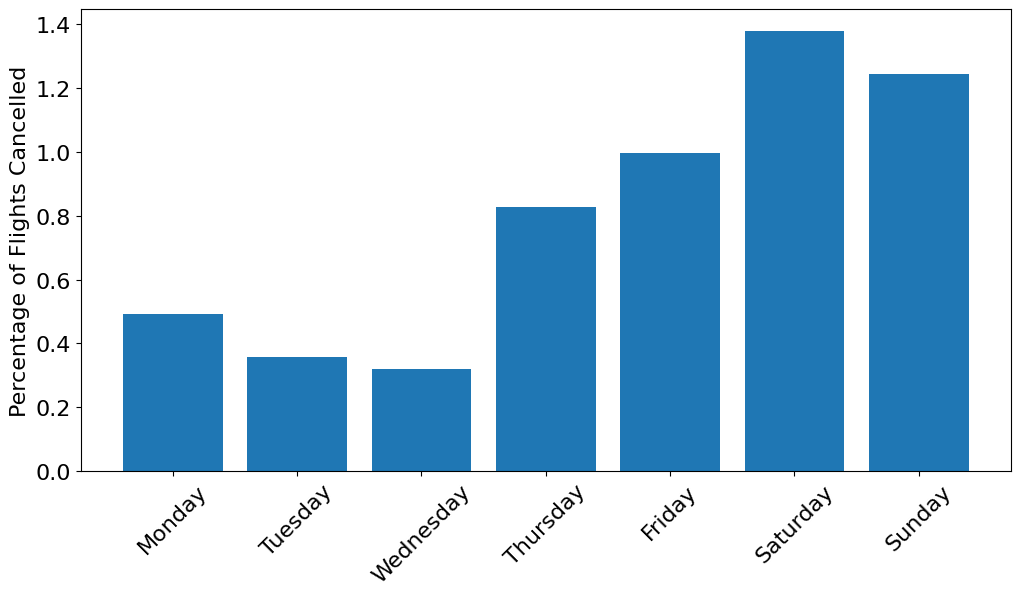

In [13]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

font = {'size'   : 16}
plt.rc('font', **font)

days_cancelled = cancelled['CANCELLED'].groupby(df['DAY_OF_WEEK']).count()
days_total = df['CANCELLED'].groupby(df['DAY_OF_WEEK']).count()
days_frac = np.divide(days_cancelled, days_total)
x=days_frac.index.values
week = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

fig, ax = plt.subplots(figsize = (12,6))
ax.bar(x,days_frac*100, align='center')
ax.set_ylabel('Percentage of Flights Cancelled')
ax.set_xticks(x)
ax.set_xticklabels(week, rotation = 45)

#This shows that Monday has the lowest percentage of cancelled flights, and Tuesday has the highest, double that of Monday's percentage.

3967694     850.0
4541012    1100.0
4027390    1815.0
5497445    1151.0
4519037     821.0
5518869    1835.0
4004521     950.0
5085523    1825.0
5450329    1910.0
4005462    1430.0
Name: CRS_DEP_TIME, dtype: float64


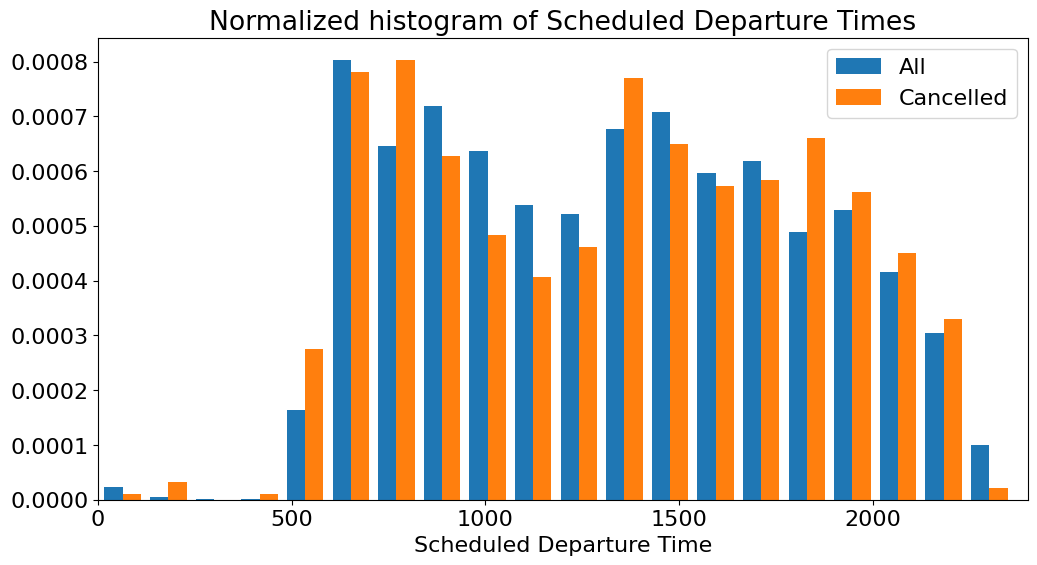

In [14]:
import matplotlib.pyplot as plt

# Example of printing the first 10 values of the 'CRS_DEP_TIME' column
print(df['CRS_DEP_TIME'].head(10))

fig, ax = plt.subplots(figsize=(12, 6))

# Use density parameter instead of normed
ax.hist([df['CRS_DEP_TIME'], cancelled['CRS_DEP_TIME']], density=1, bins=20, label=['All', 'Cancelled'])

ax.set_xlim(0, 2400)
ax.set_xlabel('Scheduled Departure Time')
ax.set_title('Normalized histogram of Scheduled Departure Times')

plt.legend()
plt.show()

#This shows that early morning and late night flights are slightly more likely to be cancelled


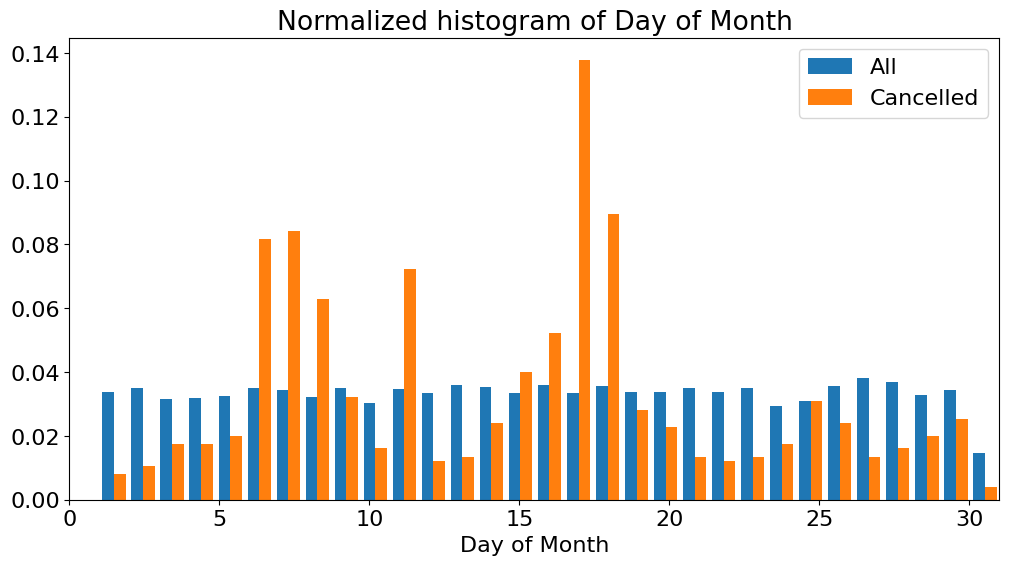

In [15]:
df['DAY_OF_MONTH'].head(10)
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize = (12,6))

ax.hist([df['DAY_OF_MONTH'], cancelled['DAY_OF_MONTH']], density=1, bins=31, label=['All', 'Cancelled'])

ax.set_xlim(0,31)

ax.set_xlabel('Day of Month')
ax.set_title('Normalized histogram of Day of Month')

plt.legend()
plt.show()

# analysis for the day of tthe month

In [16]:
import numpy as np

def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]]  # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) // nGraphPerRow  # Use integer division to calculate number of rows
    plt.figure(num=None, figsize=(6 * nGraphPerRow, 8 * nGraphRow), dpi=80, facecolor='w', edgecolor='k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if not np.issubdtype(type(columnDf.iloc[0]), np.number):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation=90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad=1.0, w_pad=1.0, h_pad=1.0)
    plt.show()

# Example usage:
# Assuming df is your DataFrame containing the dataset
# plotPerColumnDistribution(df, nGraphShown=15, nGraphPerRow=3)



In [17]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

def plotCorrelationMatrix(df, graphWidth):
    # Finding NaN values in the dataset
    nan_columns = df.columns[df.isna().any()].tolist()
    print("Columns with NaN values:", nan_columns)

    # Dropping columns with NaN values
    df_without_nan = df.dropna(axis=1)
    dropped_columns = list(set(df.columns) - set(df_without_nan.columns))
    print("Columns dropped due to NaN values:", dropped_columns)

    # Dropping 'FL_DATE' column
    if 'FL_DATE' in df.columns:
        df = df.drop(columns=['FL_DATE'])
        print("Column 'FL_DATE' dropped")

    # Encode string columns to float using label encoding
    label_encoder = LabelEncoder()
    for col in df.columns:
        if df[col].dtype == 'object':
            df[col] = label_encoder.fit_transform(df[col])

    # filename = df.dataframeName  # Assuming this attribute is not available
    # df = df.dropna('columns')  # drop columns with NaN - commented out since it may not be needed
    df = df[[col for col in df if df[col].nunique() > 1]]  # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum=1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title('Correlation Matrix - Flight Delay Dataset', fontsize=15)  # Updated title
    plt.show()

# Example usage:
# Assuming df is your DataFrame containing the dataset
# plotCorrelationMatrix(df, graphWidth=10)



In [18]:
# Scatter and density plots
def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    #df = df.dropna('columns')
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(df)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()

In [19]:
# df1 = pd.read_csv('../input/final_data.csv', usecols=use_cols).sample(300000, random_state=44)
# df1 = df[df["MONTH"].isin([10,11,12])]
# df1.head()
nRowsRead = 1000 # specify 'None' if want to read whole file
# final_data.csv has 5635978 rows in reality, but we are only loading/previewing the first 1000 rows
# Load the dataset
#df = pd.read_csv('D:\\flight delay\\flight_delay\\final_data.csv', low_memory=False)
df1 = pd.read_csv('D:\\flight delay\\flight_delay\\final_data.csv',nrows = nRowsRead)
df1.dataframeName = 'final_data.csv'
nRow, nCol = df1.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 1000 rows and 65 columns


In [20]:
df1.head(5)

,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,UNIQUE_CARRIER,AIRLINE_ID,CARRIER,TAIL_NUM,FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN_CITY_MARKET_ID,ORIGIN,ORIGIN_CITY_NAME,ORIGIN_STATE_ABR,ORIGIN_STATE_FIPS,ORIGIN_STATE_NM,ORIGIN_WAC,DEST_AIRPORT_ID,DEST_AIRPORT_SEQ_ID,DEST_CITY_MARKET_ID,DEST,DEST_CITY_NAME,DEST_STATE_ABR,DEST_STATE_FIPS,DEST_STATE_NM,DEST_WAC,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,DEP_DELAY_NEW,DEP_DEL15,DEP_DELAY_GROUP,DEP_TIME_BLK,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,ARR_DELAY_NEW,ARR_DEL15,ARR_DELAY_GROUP,ARR_TIME_BLK,CANCELLED,CANCELLATION_CODE,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,FLIGHTS,DISTANCE,DISTANCE_GROUP,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,FIRST_DEP_TIME,TOTAL_ADD_GTIME,LONGEST_ADD_GTIME,Unnamed: 64
0,2016,1,1,6,3,2016-01-06,AA,19805,AA,N4YBAA,43,11298,1129804,30194,DFW,"Dallas/Fort Worth, TX",TX,48.0,Texas,74,11433,1143302,31295,DTW,"Detroit, MI",MI,26.0,Michigan,43.0,1100.0,1057.0,-3.0,0.0,0.0,-1.0,1100-1159,15.0,1112.0,1424.0,8.0,1438.0,1432.0,-6.0,0.0,0.0,-1.0,1400-1459,0.0,NaN,0.0,158.0,155.0,132.0,1.0,986.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2016,1,1,7,4,2016-01-07,AA,19805,AA,N434AA,43,11298,1129804,30194,DFW,"Dallas/Fort Worth, TX",TX,48.0,Texas,74,11433,1143302,31295,DTW,"Detroit, MI",MI,26.0,Michigan,43.0,1100.0,1056.0,-4.0,0.0,0.0,-1.0,1100-1159,14.0,1110.0,1416.0,10.0,1438.0,1426.0,-12.0,0.0,0.0,-1.0,1400-1459,0.0,NaN,0.0,158.0,150.0,126.0,1.0,986.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2016,1,1,8,5,2016-01-08,AA,19805,AA,N541AA,43,11298,1129804,30194,DFW,"Dallas/Fort Worth, TX",TX,48.0,Texas,74,11433,1143302,31295,DTW,"Detroit, MI",MI,26.0,Michigan,43.0,1100.0,1055.0,-5.0,0.0,0.0,-1.0,1100-1159,21.0,1116.0,1431.0,14.0,1438.0,1445.0,7.0,7.0,0.0,0.0,1400-1459,0.0,NaN,0.0,158.0,170.0,135.0,1.0,986.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2016,1,1,9,6,2016-01-09,AA,19805,AA,N489AA,43,11298,1129804,30194,DFW,"Dallas/Fort Worth, TX",TX,48.0,Texas,74,11433,1143302,31295,DTW,"Detroit, MI",MI,26.0,Michigan,43.0,1100.0,1102.0,2.0,2.0,0.0,0.0,1100-1159,13.0,1115.0,1424.0,9.0,1438.0,1433.0,-5.0,0.0,0.0,-1.0,1400-1459,0.0,NaN,0.0,158.0,151.0,129.0,1.0,986.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2016,1,1,10,7,2016-01-10,AA,19805,AA,N439AA,43,11298,1129804,30194,DFW,"Dallas/Fort Worth, TX",TX,48.0,Texas,74,11433,1143302,31295,DTW,"Detroit, MI",MI,26.0,Michigan,43.0,1100.0,1240.0,100.0,100.0,1.0,6.0,1100-1159,20.0,1300.0,1617.0,14.0,1438.0,1631.0,113.0,113.0,1.0,7.0,1400-1459,0.0,NaN,0.0,158.0,171.0,137.0,1.0,986.0,4.0,0.0,0.0,47.0,0.0,66.0,NaN,NaN,NaN,NaN


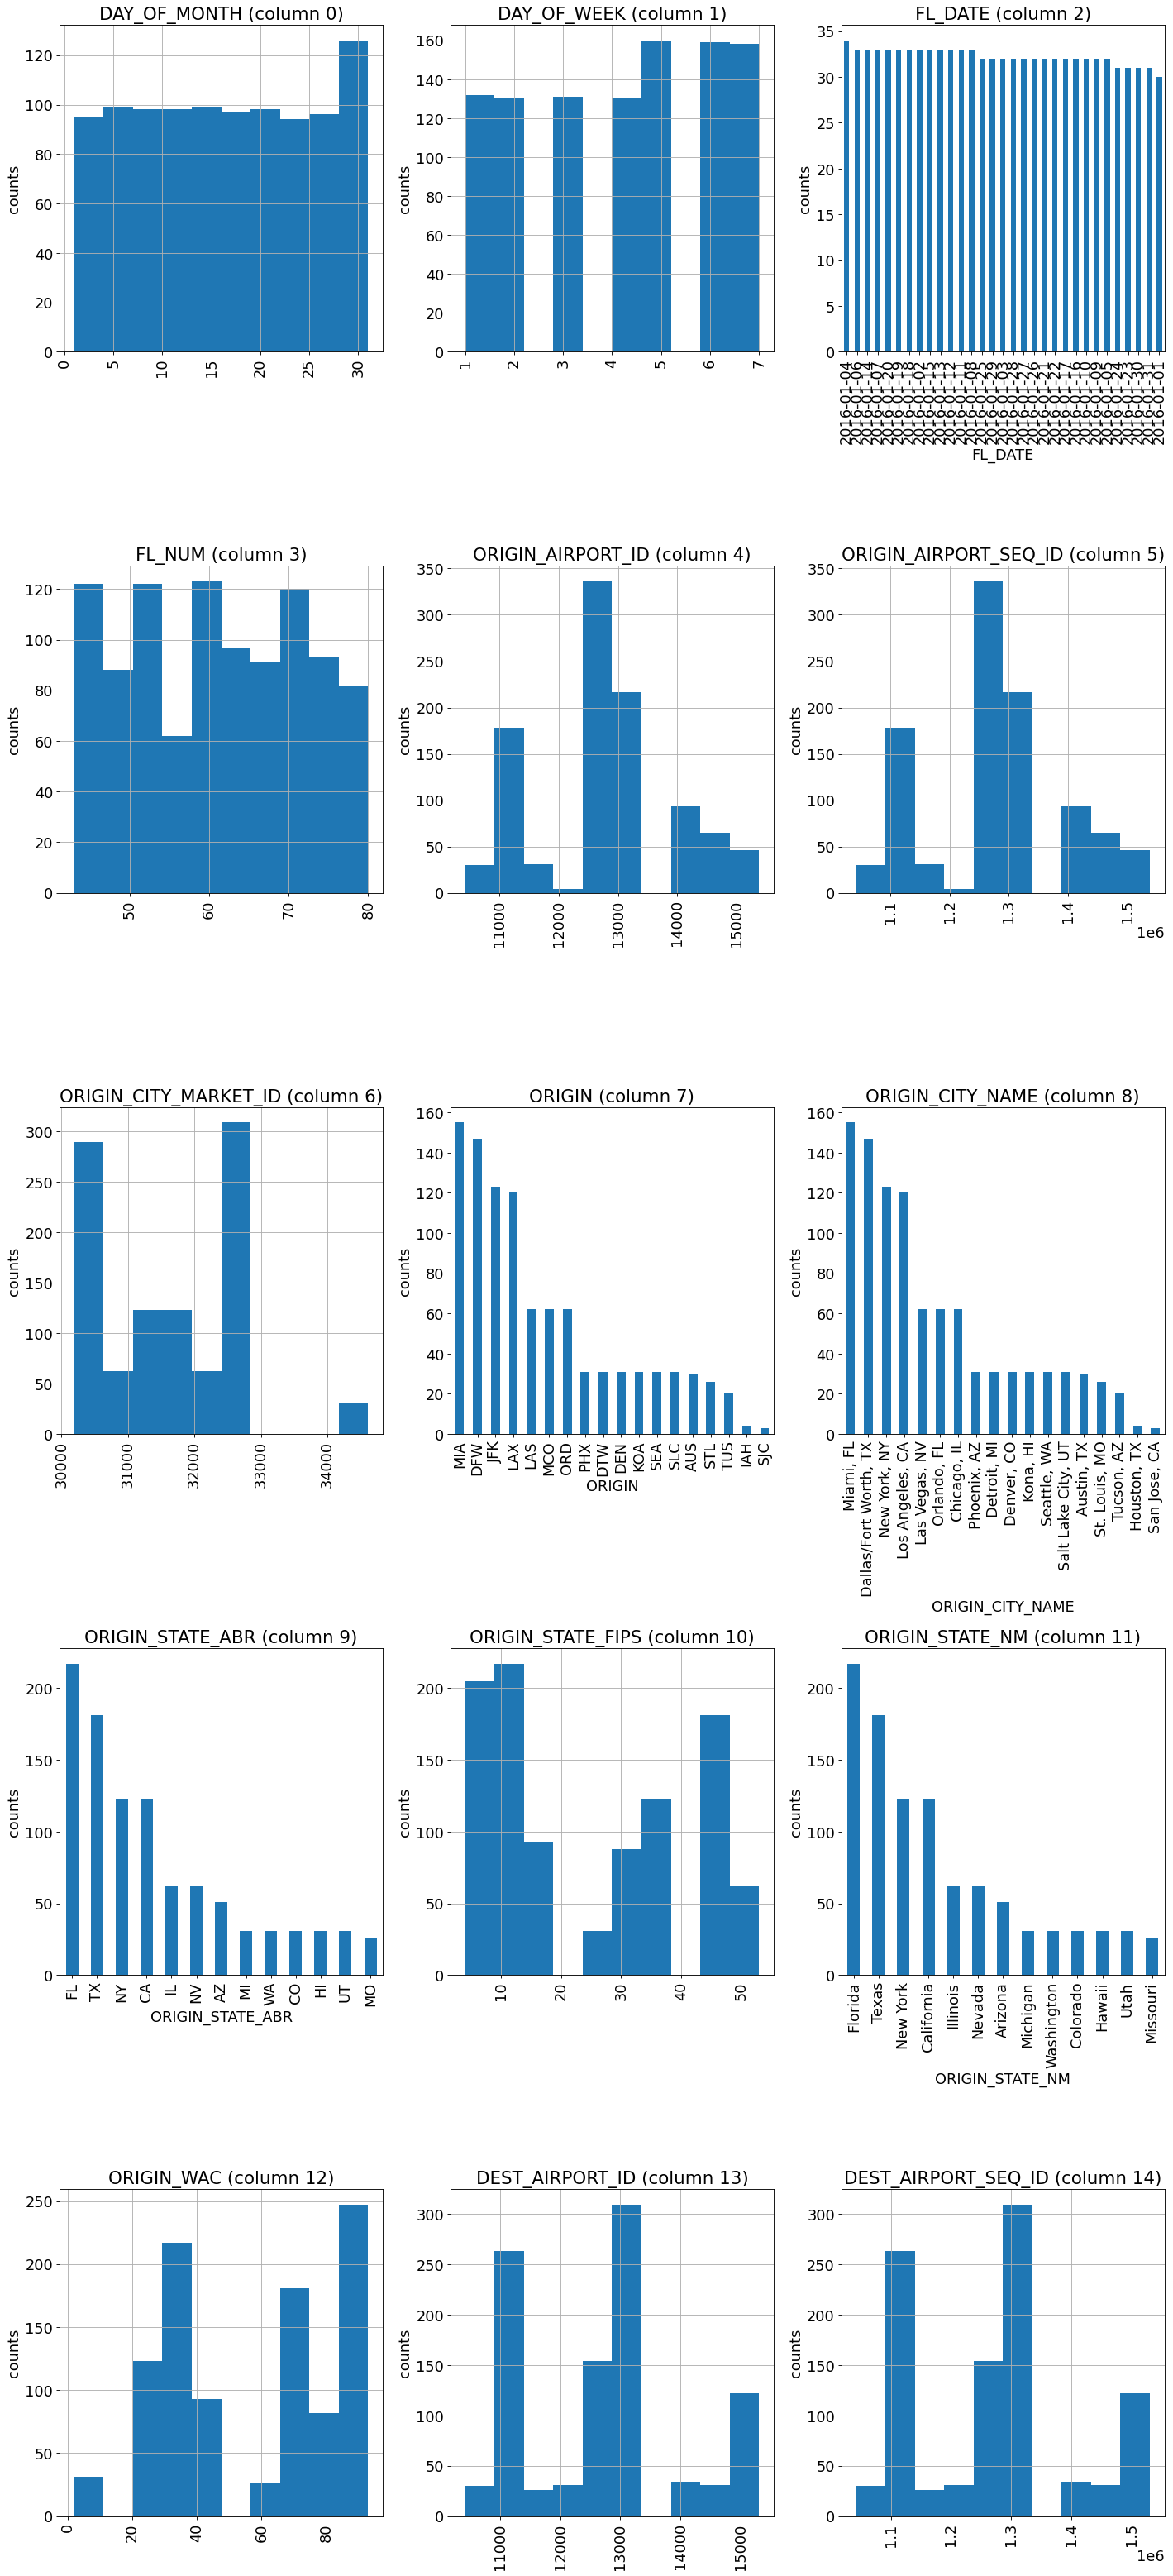

In [21]:
plotPerColumnDistribution(df1, 15, 3)

Columns with NaN values: ['TAIL_NUM', 'DEP_TIME', 'DEP_DELAY', 'DEP_DELAY_NEW', 'DEP_DEL15', 'DEP_DELAY_GROUP', 'TAXI_OUT', 'WHEELS_OFF', 'WHEELS_ON', 'TAXI_IN', 'ARR_TIME', 'ARR_DELAY', 'ARR_DELAY_NEW', 'ARR_DEL15', 'ARR_DELAY_GROUP', 'CANCELLATION_CODE', 'ACTUAL_ELAPSED_TIME', 'AIR_TIME', 'CARRIER_DELAY', 'WEATHER_DELAY', 'NAS_DELAY', 'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY', 'FIRST_DEP_TIME', 'TOTAL_ADD_GTIME', 'LONGEST_ADD_GTIME', 'Unnamed: 64']
Columns dropped due to NaN values: ['ACTUAL_ELAPSED_TIME', 'ARR_DEL15', 'CANCELLATION_CODE', 'DEP_DELAY_NEW', 'ARR_DELAY', 'ARR_TIME', 'DEP_TIME', 'WHEELS_ON', 'TAXI_IN', 'DEP_DELAY_GROUP', 'LONGEST_ADD_GTIME', 'NAS_DELAY', 'TAIL_NUM', 'TAXI_OUT', 'ARR_DELAY_NEW', 'FIRST_DEP_TIME', 'CARRIER_DELAY', 'DEP_DEL15', 'TOTAL_ADD_GTIME', 'Unnamed: 64', 'WHEELS_OFF', 'LATE_AIRCRAFT_DELAY', 'DEP_DELAY', 'SECURITY_DELAY', 'ARR_DELAY_GROUP', 'AIR_TIME', 'WEATHER_DELAY']
Column 'FL_DATE' dropped


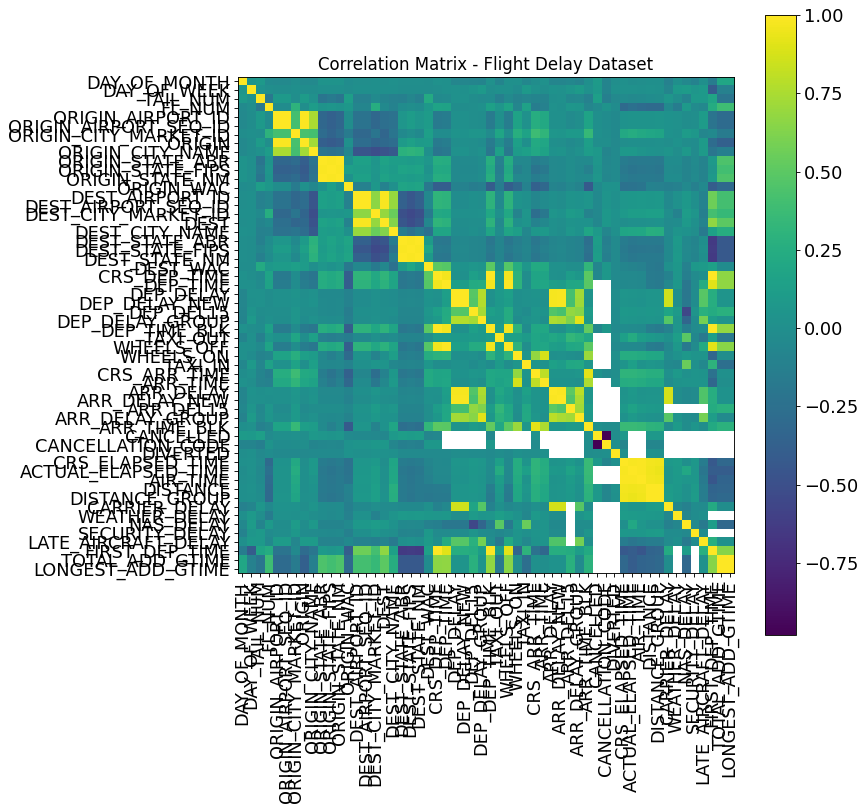

In [22]:
plotCorrelationMatrix(df1, 10)

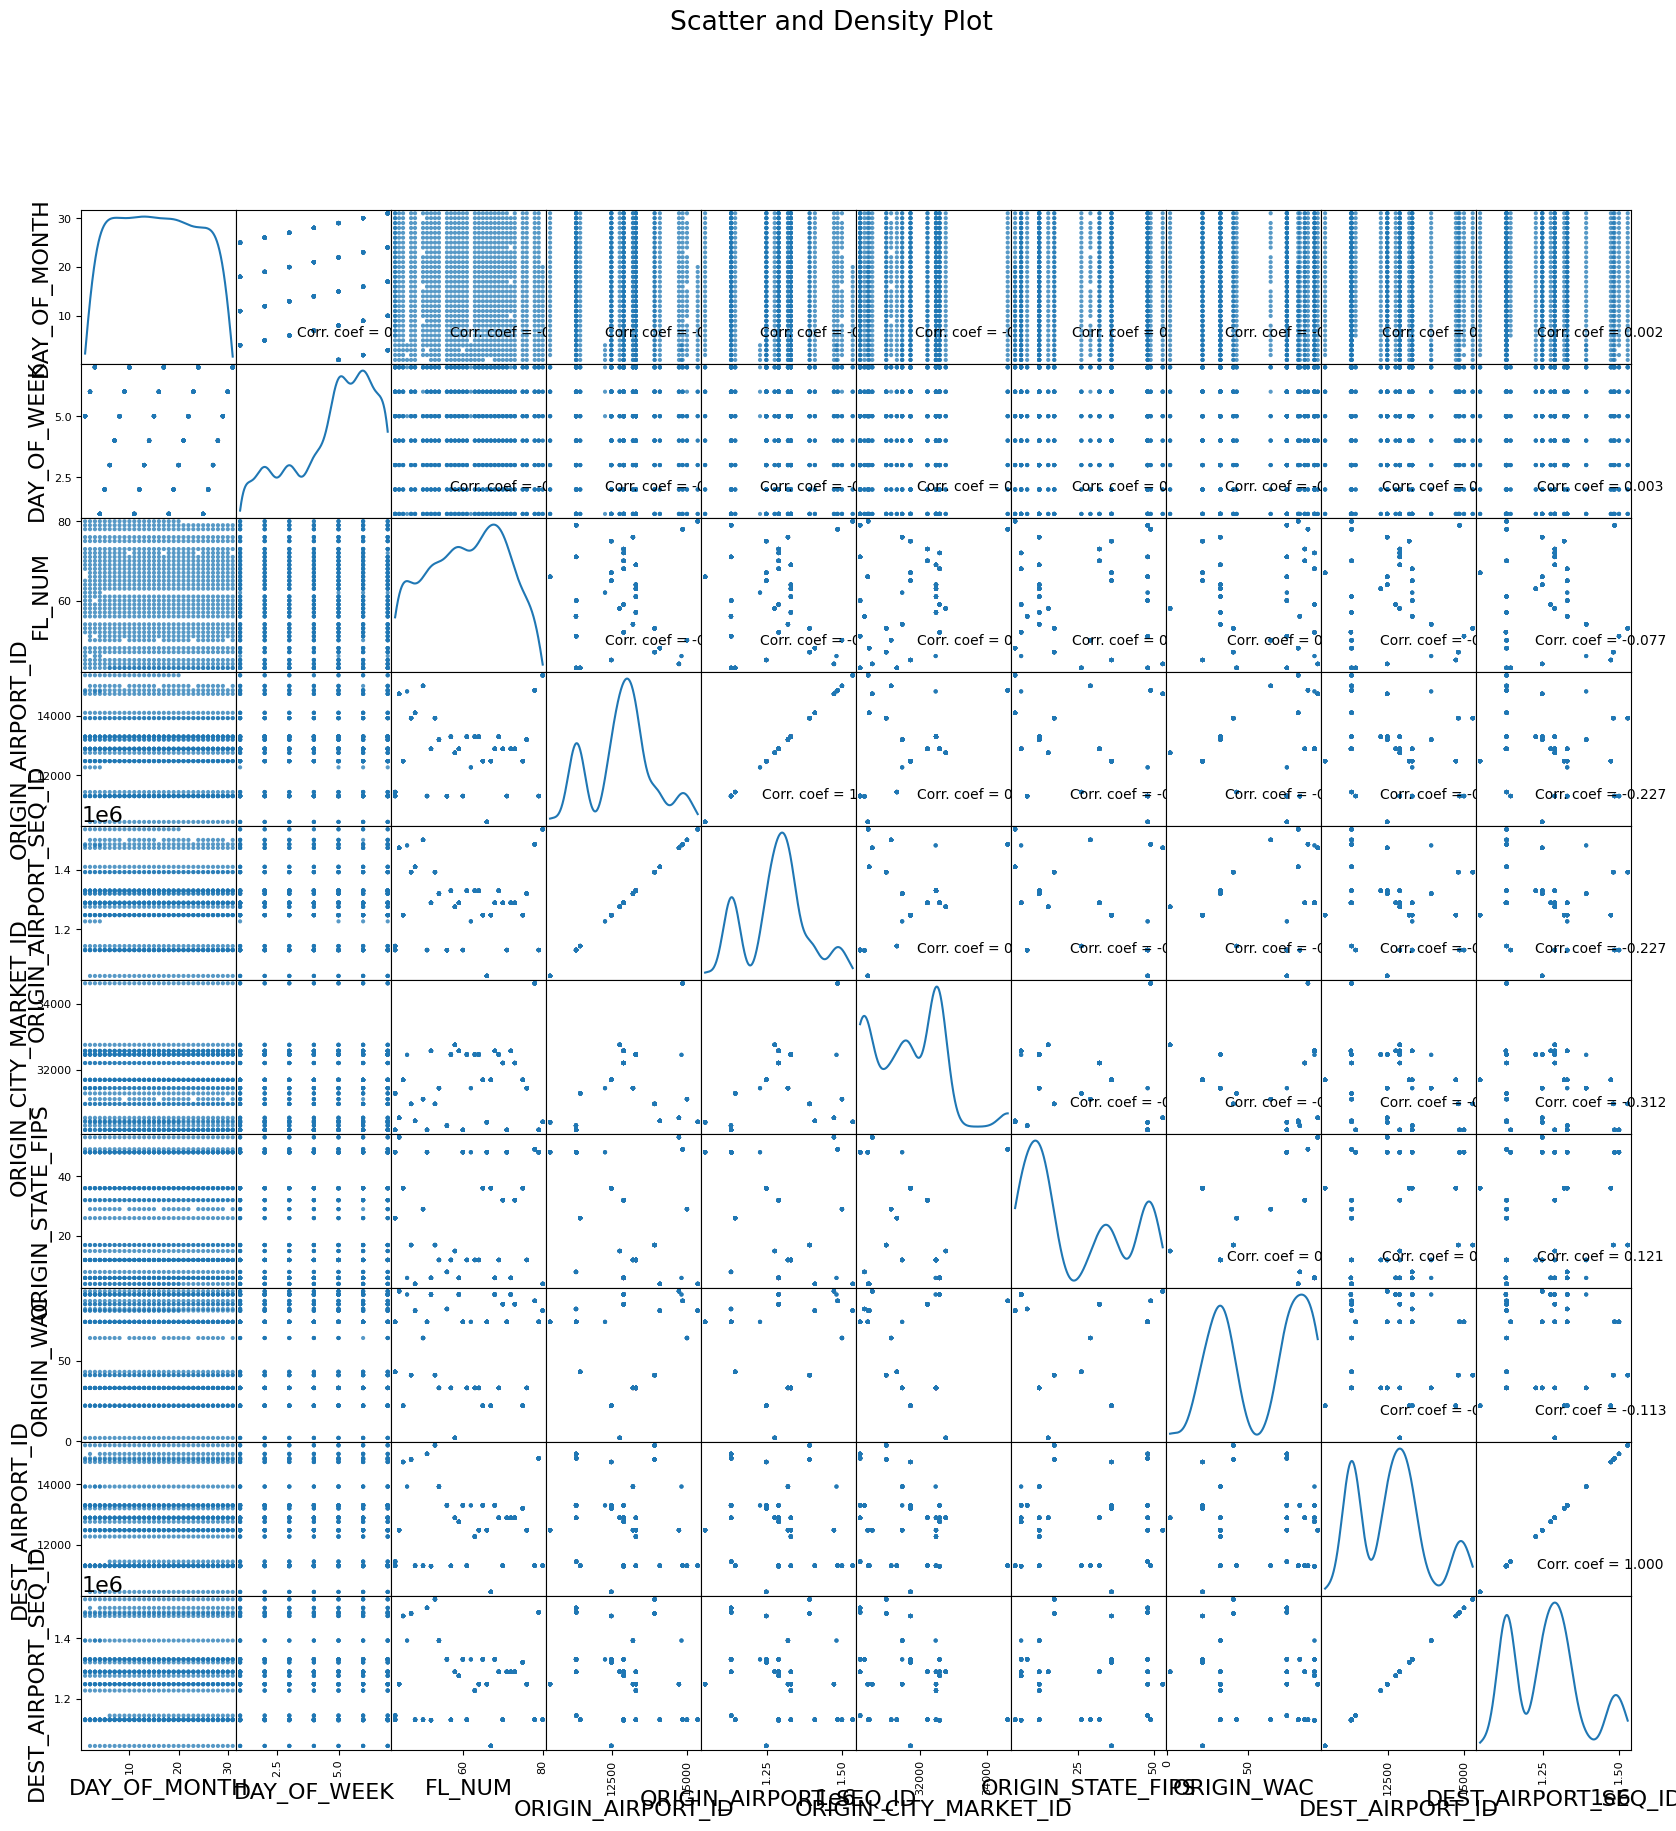

In [23]:
plotScatterMatrix(df1, 20, 10)

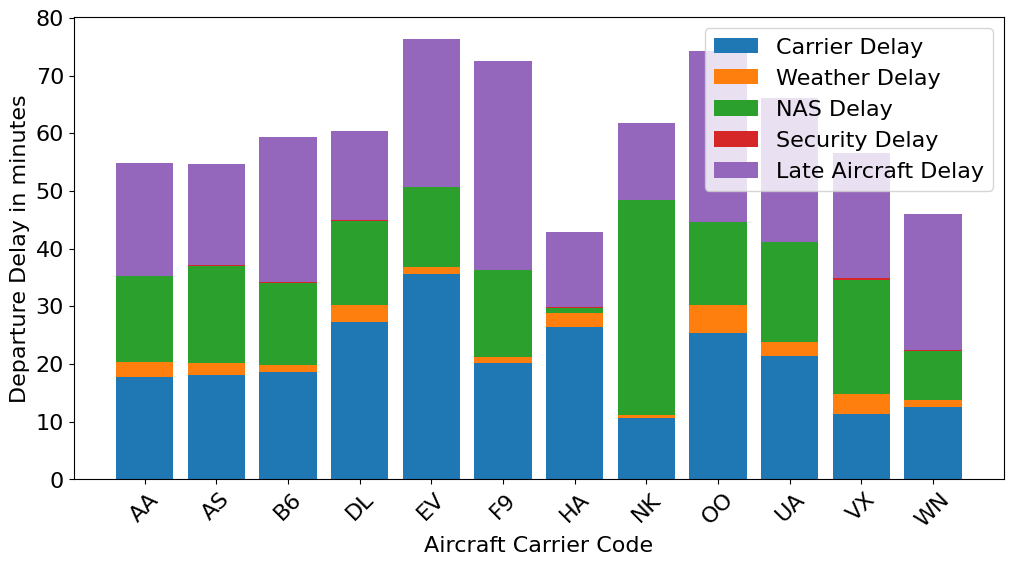

In [24]:
#Here we grouped by the carriers and added up all the delay time reasons to get an idea of average delay times and their reasons for all the different carriers

import matplotlib.pyplot as plt

df['total_delay'] = (df['CARRIER_DELAY'] + df['WEATHER_DELAY']
             + df['NAS_DELAY'] + df['SECURITY_DELAY'] + df['LATE_AIRCRAFT_DELAY'])

df_delayed = df[~np.isnan(df['total_delay'])]
df['total_delay'].fillna(0, inplace=True)
df_delayed.head()

carrier_group = df_delayed['CARRIER_DELAY'].groupby(df_delayed['UNIQUE_CARRIER']).mean()
weather_group = df_delayed['WEATHER_DELAY'].groupby(df_delayed['UNIQUE_CARRIER']).mean()
nas_group = df_delayed['NAS_DELAY'].groupby(df_delayed['UNIQUE_CARRIER']).mean()
security_group = df_delayed['SECURITY_DELAY'].groupby(df_delayed['UNIQUE_CARRIER']).mean()
late_group = df_delayed['LATE_AIRCRAFT_DELAY'].groupby(df_delayed['UNIQUE_CARRIER']).mean()

w_bottom = carrier_group.values
n_bottom = w_bottom + weather_group.values
s_bottom = n_bottom + nas_group.values
l_bottom = s_bottom + security_group.values

x = carrier_group.index.values

fig, ax = plt.subplots(figsize = (12,6))

ax.set_xticks(np.arange(len(x)))
ax.set_xticklabels(x, rotation = 45)
ax.bar(np.arange(len(x)),carrier_group.values, align='center', label='Carrier Delay')
ax.bar(np.arange(len(x)),weather_group.values, align='center', bottom=w_bottom, label='Weather Delay')
ax.bar(np.arange(len(x)),nas_group.values, align='center', bottom=n_bottom, label='NAS Delay')
ax.bar(np.arange(len(x)),security_group.values, align='center', bottom=s_bottom, label='Security Delay')
ax.bar(np.arange(len(x)),late_group.values, align='center', bottom=l_bottom, label='Late Aircraft Delay')

ax.set_xlabel('Aircraft Carrier Code')
ax.set_ylabel('Departure Delay in minutes')

plt.legend()
plt.show()

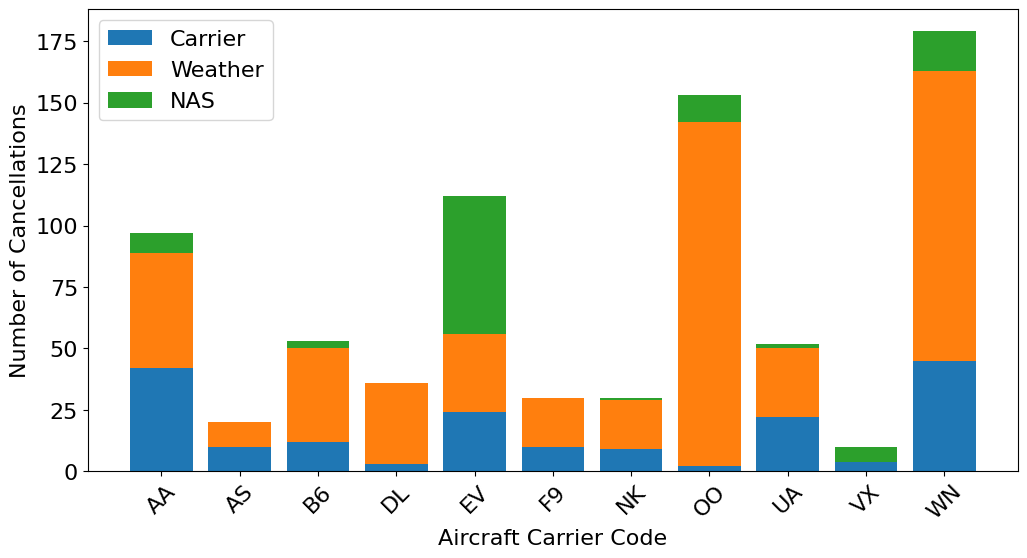

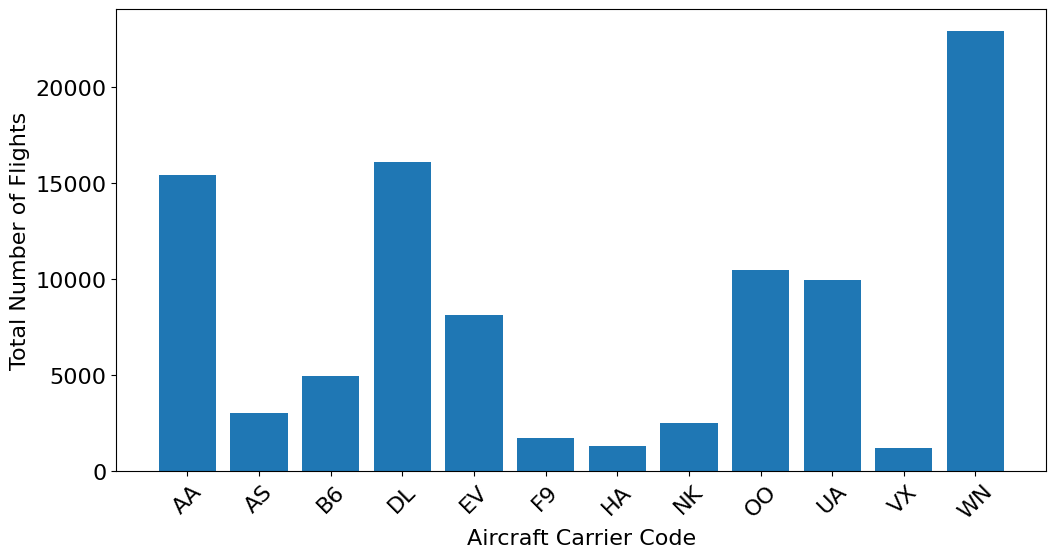

In [25]:
import matplotlib.pyplot as plt

cancelled_group = cancelled.groupby(['UNIQUE_CARRIER','CANCELLATION_CODE']).size().reindex(fill_value=0.0).unstack()
cg = cancelled_group.fillna(0)

b_bottom = cg.loc[:,'A'].values
c_bottom = b_bottom + cg.loc[:,'B'].values
d_bottom = c_bottom + cg.loc[:,'B'].values

x = cg.loc[:,'A'].index.values

fig, ax = plt.subplots(figsize = (12,6))

ax.set_xticks(np.arange(len(x)))
ax.set_xticklabels(x, rotation = 45)
ax.bar(np.arange(len(x)),cg.loc[:,'A'].values, align='center', label='Carrier')
ax.bar(np.arange(len(x)),cg.loc[:,'B'].values, align='center', bottom=b_bottom, label='Weather')
ax.bar(np.arange(len(x)),cg.loc[:,'C'].values, align='center', bottom=c_bottom, label='NAS')
#ax.bar(np.arange(len(x)),cancelled_group.loc[:,'D'].values, align='center', bottom=d_bottom, label='Security')

ax.set_xlabel('Aircraft Carrier Code')
ax.set_ylabel('Number of Cancellations')

plt.legend()
plt.show()

total_flights_per_carrier = df['UNIQUE_CARRIER'].groupby(df['UNIQUE_CARRIER']).count()

fig, ax1 = plt.subplots(figsize = (12,6))

x = total_flights_per_carrier.index.values

ax1.set_xticks(np.arange(len(x)))
ax1.set_xticklabels(x, rotation = 45)
ax1.bar(np.arange(len(x)),total_flights_per_carrier.values, align='center')

ax1.set_xlabel('Aircraft Carrier Code')
ax1.set_ylabel('Total Number of Flights')

plt.show()

In [27]:
carrier_flights = df['UNIQUE_CARRIER'].groupby(df['UNIQUE_CARRIER']).count()
carrier_cancelled = df['CANCELLED'].groupby(df['UNIQUE_CARRIER']).sum()
carrier_delayed = df_delayed['UNIQUE_CARRIER'].groupby(df_delayed['UNIQUE_CARRIER']).count()
carrier_diverted = df['DIVERTED'].groupby(df['UNIQUE_CARRIER']).sum()
carrier_avg_time = df['AIR_TIME'].groupby(df['UNIQUE_CARRIER']).mean()
carrier_avg_dist = df['DISTANCE'].groupby(df['UNIQUE_CARRIER']).mean()
carrier_avg_delay = df['total_delay'].groupby(df['UNIQUE_CARRIER']).mean()
carrier_avg_taxiIn = df['TAXI_IN'].groupby(df['UNIQUE_CARRIER']).mean()
carrier_avg_taxiOut = df['TAXI_OUT'].groupby(df['UNIQUE_CARRIER']).mean()
carrier_pct_cancelled = 100*np.divide(carrier_cancelled, carrier_flights)

carrier_names = pd.Series(['American Airlines','Alaska Airlines','JetBlue Airways',
                          'Delta Airlines','Atlantic Southeast Airlines','Frontier Airlines',
                          'Hawaiian Airlines','Northwest Airlines','Skywest Airlines','United Airlines',
                          'Mesa Airlines','Southwest Airlines'], index=carrier_flights.index)
# carrier_names = pd.Series(['Pinnacle Airlines', 'American Airlines', 'Alaska Airlines', 'Jetblue Airways',
#                       'Cobaltair', 'Delta Air Lines', 'ExpressJet Airlines', 'Frontier Airlines', 'AirTran Airways',
#                       'Hawaiian Airlines', 'Envoy Air', 'Northwest Airlines', 'US Airways Express', 
#                       'SkyWest Airlines', 'United Airlines', 'US Airways', 'Southwest Airlines',
#                       'JetSuiteX Air', 'Mesa Airlines'], index=carrier_flights.index)

summary_table_carrier = pd.concat([carrier_names, carrier_flights, carrier_cancelled, carrier_pct_cancelled, 
                                   carrier_diverted, 
                           carrier_avg_time, carrier_avg_dist, carrier_avg_delay,
                          carrier_avg_taxiIn, carrier_avg_taxiOut], axis=1)

summary_table_carrier.columns = ['Carrier Name', 'Total Flights', 'Cancelled Flights', 'Percent Cancelled',
                         'Diverted Flights', 'Average Flight Time (minutes)',
                         'Average Flight Distance (miles)', 'Average Flight Delay (minutes)', 
                         'Average Taxi-In (minutes)', 'Average Taxi-Out (minutes)']



summary_table_carrier

,Carrier Name,Total Flights,Cancelled Flights,Percent Cancelled,Diverted Flights,Average Flight Time (minutes),Average Flight Distance (miles),Average Flight Delay (minutes),Average Taxi-In (minutes),Average Taxi-Out (minutes)
UNIQUE_CARRIER,,,,,,,,,,
AA,American Airlines,15416,97.0,0.629216,19.0,135.496275,1007.030358,8.798780,9.024284,18.318046
AS,Alaska Airlines,3011,20.0,0.664231,3.0,161.690428,1226.445367,7.600465,6.872155,15.810694
B6,JetBlue Airways,4936,53.0,1.073744,8.0,144.539897,1065.885737,12.588736,6.595453,16.443679
DL,Delta Airlines,16101,36.0,0.223589,20.0,114.265005,837.412769,6.495311,6.983442,16.950314
EV,Atlantic Southeast Airlines,8146,112.0,1.374908,22.0,70.904393,449.092561,13.005156,7.333292,17.050331
F9,Frontier Airlines,1727,30.0,1.737116,1.0,143.360849,1092.291836,16.515345,11.738951,15.409959
HA,Hawaiian Airlines,1299,0.0,0.000000,2.0,78.880493,584.431101,4.155504,6.848345,11.181678
NK,Northwest Airlines,2513,30.0,1.193792,1.0,133.059629,984.083963,10.974930,8.780507,14.765619
OO,Skywest Airlines,10467,153.0,1.461737,37.0,75.639875,493.791917,11.785612,7.003106,19.095252


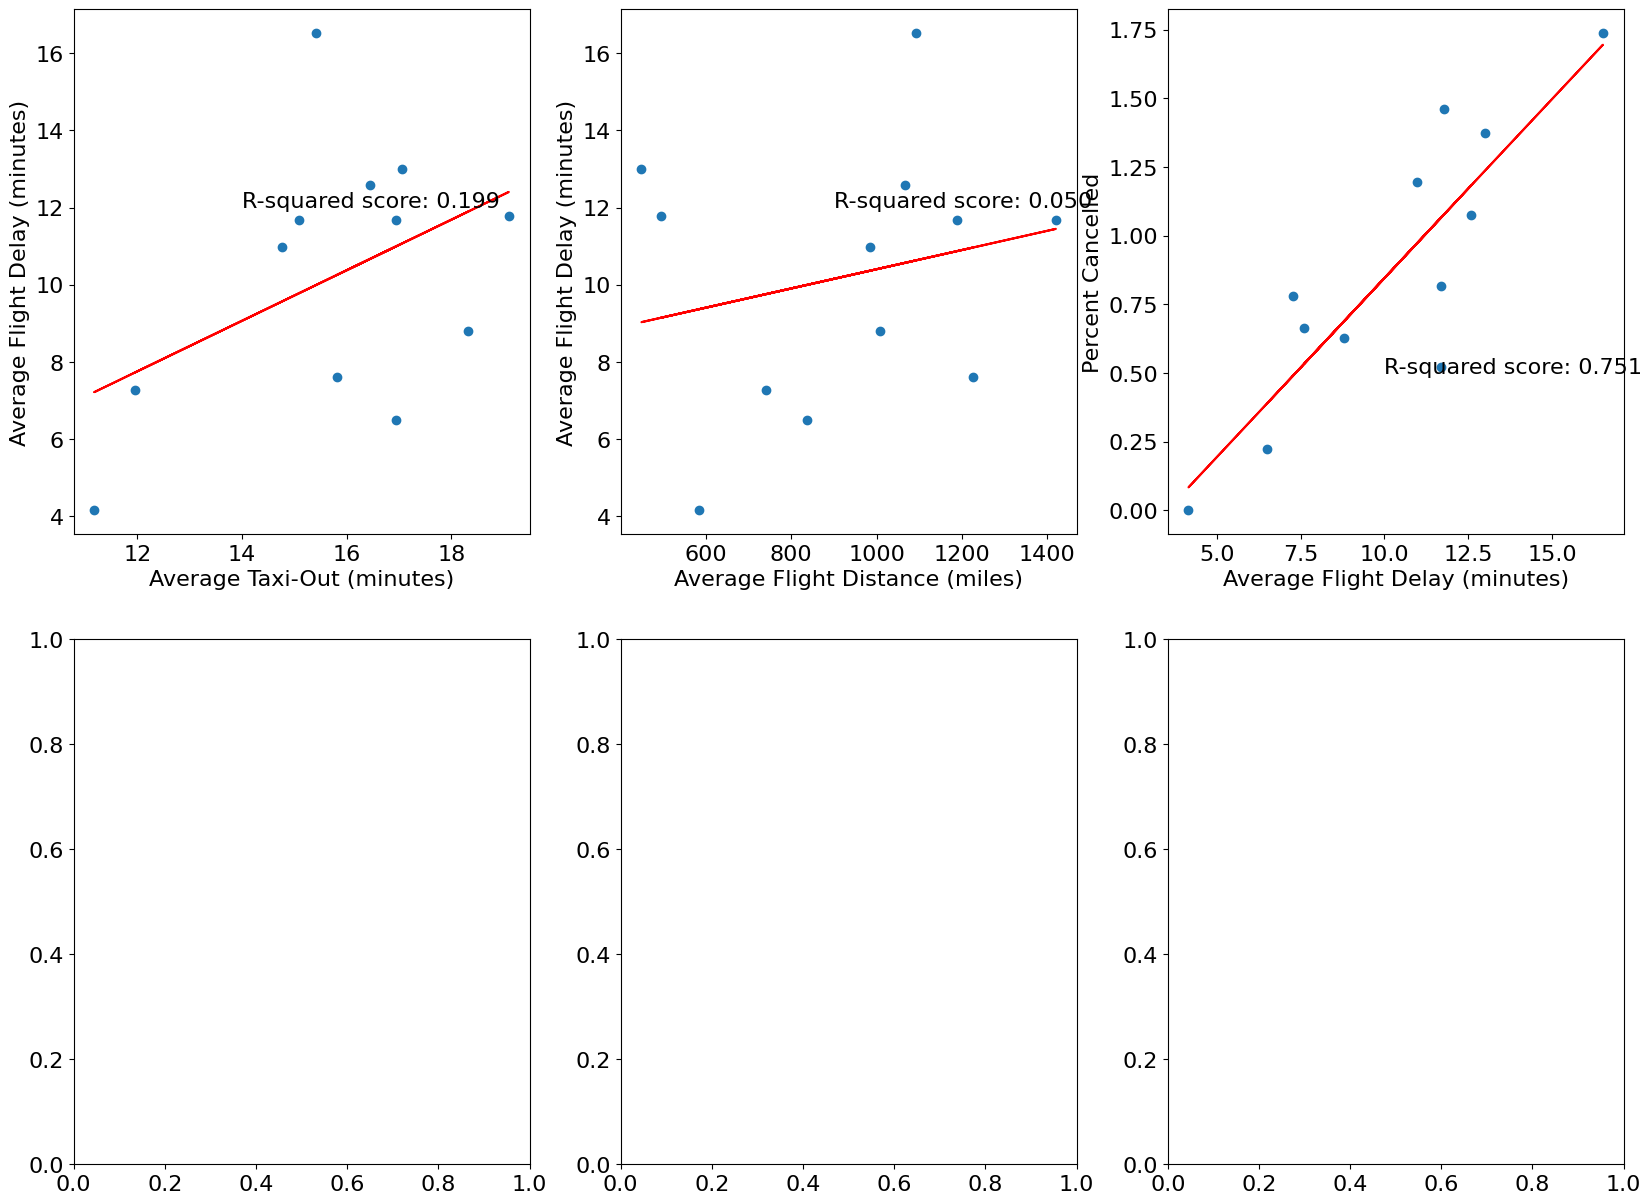

In [28]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer

# Assuming you have already loaded your data and created necessary variables

# Handle NaN values using SimpleImputer
imputer = SimpleImputer(strategy='mean')  # You can choose a strategy based on your data
carrier_avg_taxiOut_imputed = imputer.fit_transform(carrier_avg_taxiOut.values.reshape(-1, 1))
carrier_avg_dist_imputed = imputer.fit_transform(carrier_avg_dist.values.reshape(-1, 1))
summary_table_carrier_imputed = imputer.fit_transform(summary_table_carrier[['Average Flight Delay (minutes)', 'Average Taxi-Out (minutes)', 'Average Flight Time (minutes)']])

fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3, figsize=(20, 15))

# Plot 1
ax1.scatter(carrier_avg_taxiOut_imputed, carrier_avg_delay)
X1 = carrier_avg_taxiOut_imputed.reshape(-1, 1)
linreg1 = LinearRegression().fit(X1, carrier_avg_delay)
ax1.plot(carrier_avg_taxiOut_imputed, linreg1.predict(X1), 'r-')
ax1.text(14, 12, 'R-squared score: {:.3f}'.format(linreg1.score(X1, carrier_avg_delay)))
ax1.set_xlabel('Average Taxi-Out (minutes)')
ax1.set_ylabel('Average Flight Delay (minutes)')

# Plot 2
ax2.scatter(carrier_avg_dist_imputed, carrier_avg_delay)
X2 = carrier_avg_dist_imputed.reshape(-1, 1)
linreg2 = LinearRegression().fit(X2, carrier_avg_delay)
ax2.plot(carrier_avg_dist_imputed, linreg2.predict(X2), 'r-')
ax2.text(900, 12, 'R-squared score: {:.3f}'.format(linreg2.score(X2, carrier_avg_delay)))
ax2.set_xlabel('Average Flight Distance (miles)')
ax2.set_ylabel('Average Flight Delay (minutes)')

# Plot 3
X3 = summary_table_carrier_imputed[:, 0]  # Average Flight Delay
y = summary_table_carrier['Percent Cancelled']
ax3.scatter(X3, y)
X3 = X3.reshape(-1, 1)
linreg3 = LinearRegression().fit(X3, y)
ax3.plot(X3, linreg3.predict(X3), 'r-')
ax3.text(10, 0.5, 'R-squared score: {:.3f}'.format(linreg3.score(X3, y)))
ax3.set_xlabel('Average Flight Delay (minutes)')
ax3.set_ylabel('Percent Cancelled')

plt.show()








In [29]:
origin_flights = df['ORIGIN'].groupby(df['ORIGIN']).count()
origin_cancelled = df['CANCELLED'].groupby(df['ORIGIN']).sum()
origin_delayed = df_delayed['UNIQUE_CARRIER'].groupby(df_delayed['ORIGIN']).count()
origin_diverted = df['DIVERTED'].groupby(df['ORIGIN']).sum()
origin_avg_time = df['AIR_TIME'].groupby(df['ORIGIN']).mean()
origin_avg_dist = df['DISTANCE'].groupby(df['ORIGIN']).mean()
origin_avg_delay = df['total_delay'].groupby(df['ORIGIN']).mean()
#origin_avg_taxiIn = df['TaxiIn'].groupby(df['Origin']).mean()
origin_avg_taxiOut = df['TAXI_OUT'].groupby(df['ORIGIN']).mean()
origin_pct_cancelled = 100*np.divide(origin_cancelled, origin_flights)

summary_table_origin = pd.concat([origin_flights, origin_cancelled, origin_pct_cancelled, origin_diverted, 
                           origin_avg_time, origin_avg_dist, origin_avg_delay,
                           origin_avg_taxiOut], axis=1)

summary_table_origin.columns = ['Total Flights', 'Cancelled Flights', 'Percent Cancelled',
                         'Diverted Flights', 'Average Flight Time (minutes)',
                         'Average Flight Distance (miles)', 'Average Flight Delay (minutes)', 
                         'Average Taxi-Out (minutes)']

summary_table_origin = summary_table_origin.sort_values('Total Flights', ascending=False)
summary_table_origin.head(15)

,Total Flights,Cancelled Flights,Percent Cancelled,Diverted Flights,Average Flight Time (minutes),Average Flight Distance (miles),Average Flight Delay (minutes),Average Taxi-Out (minutes)
ORIGIN,,,,,,,,
ATL,6794,28.0,0.412128,12.0,92.229346,640.486753,6.395938,15.928025
ORD,4246,63.0,1.483749,10.0,116.221663,832.145313,12.140838,19.087376
DEN,3975,35.0,0.880503,9.0,115.340626,885.428176,9.498365,15.417610
LAX,3734,26.0,0.696304,7.0,158.106458,1287.191751,12.686395,18.228977
DFW,3330,26.0,0.780781,6.0,118.210127,879.382883,10.743243,18.291592
SFO,3030,39.0,1.287129,4.0,147.212923,1200.632013,12.057426,18.568647
PHX,2812,13.0,0.462304,9.0,119.732616,942.831437,8.377312,15.529872
LAS,2609,10.0,0.383289,0.0,125.992305,1004.791491,9.325412,14.536604
IAH,2397,11.0,0.458907,7.0,113.688945,841.501043,9.466834,16.434710


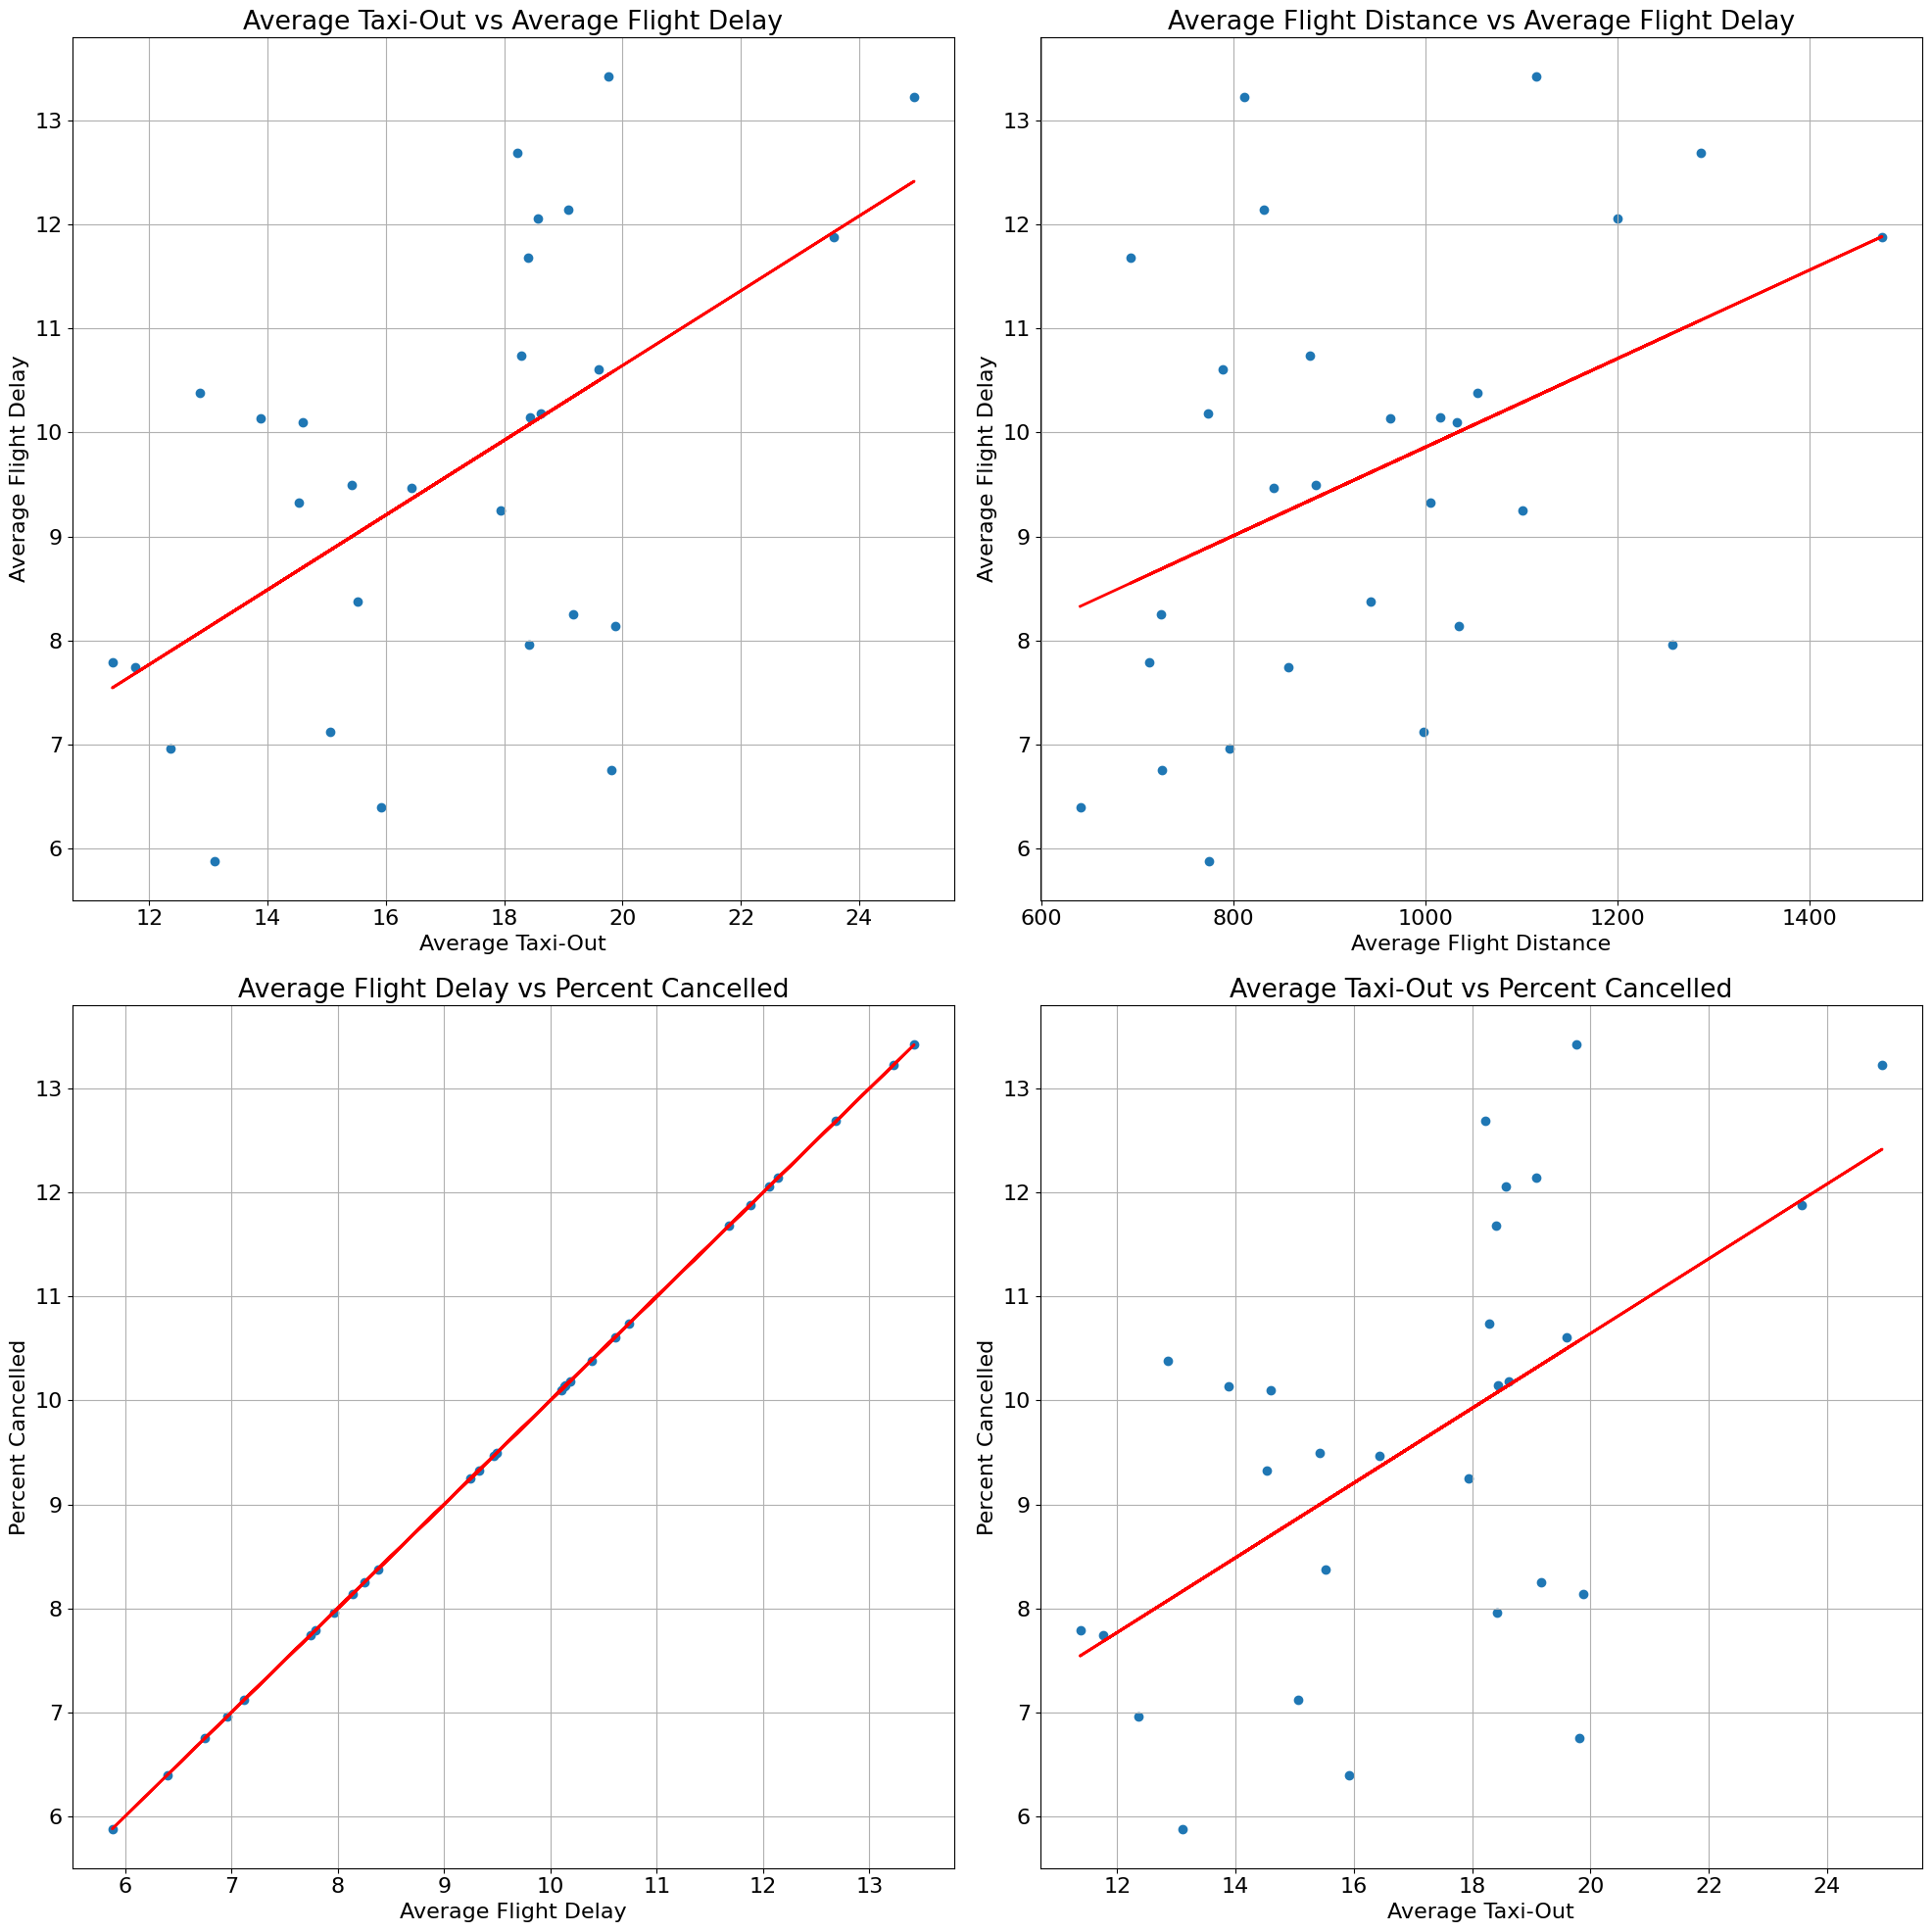

In [30]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer

# Filter the DataFrame based on the condition (e.g., Total Flights > 1000)
df1 = summary_table_origin[summary_table_origin['Total Flights'] > 1000]

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(20, 20))

# Define X and y for each subplot
X1 = df1['Average Taxi-Out (minutes)'].values.reshape(-1, 1)
X2 = df1['Average Flight Distance (miles)'].values.reshape(-1, 1)
X3 = df1['Average Flight Delay (minutes)'].values.reshape(-1, 1)
X4 = df1['Average Taxi-Out (minutes)'].values.reshape(-1, 1)

y = df1['Average Flight Delay (minutes)'].values.reshape(-1, 1)  # Target variable

# Handle missing values in y using SimpleImputer
y_imputer = SimpleImputer(strategy='mean')
y_imputed = y_imputer.fit_transform(y)

# Linear Regression and plotting for each subplot
for ax, X_data, title in zip([ax1, ax2, ax3, ax4], [X1, X2, X3, X4], ['Average Taxi-Out vs Average Flight Delay', 
                                                                   'Average Flight Distance vs Average Flight Delay', 
                                                                   'Average Flight Delay vs Percent Cancelled',
                                                                   'Average Taxi-Out vs Percent Cancelled']):
    ax.scatter(X_data, y_imputed)
    linreg = LinearRegression().fit(X_data, y_imputed)
    ax.plot(X_data, linreg.predict(X_data), color='red', linewidth=2)
    ax.set_xlabel(title.split(' vs ')[0])
    ax.set_ylabel(title.split(' vs ')[1])
    ax.set_title(title)
    ax.grid(True)

plt.tight_layout()
plt.show()



In [31]:
#Now we can do the same thing but grouping by destination instead of origin to see if we can find anything interesting.

dest_flights = df['DEST'].groupby(df['DEST']).count()
dest_cancelled = df['CANCELLED'].groupby(df['DEST']).sum()
dest_delayed = df_delayed['UNIQUE_CARRIER'].groupby(df_delayed['DEST']).count()
dest_diverted = df['DIVERTED'].groupby(df['DEST']).sum()
dest_avg_time = df['AIR_TIME'].groupby(df['DEST']).mean()
dest_avg_dist = df['DISTANCE'].groupby(df['DEST']).mean()
dest_avg_delay = df['total_delay'].groupby(df['DEST']).mean()
dest_avg_taxiIn = df['TAXI_IN'].groupby(df['DEST']).mean()
#dest_avg_taxiOut = df['TaxiOut'].groupby(df['Dest']).mean()
dest_pct_cancelled = 100*np.divide(dest_cancelled, dest_flights)

summary_table_dest = pd.concat([dest_flights, dest_cancelled, dest_pct_cancelled, dest_diverted, 
                           dest_avg_time, dest_avg_dist, dest_avg_delay,
                           dest_avg_taxiIn], axis=1)

summary_table_dest.columns = ['Total Flights', 'Cancelled Flights', 'Percent Cancelled',
                         'Diverted Flights', 'Average Flight Time (minutes)',
                         'Average Flight Distance (miles)', 'Average Flight Delay (minutes)', 
                         'Average Taxi-In (minutes)']

summary_table_dest = summary_table_dest.sort_values('Total Flights', ascending=False)
summary_table_dest.head(15)

,Total Flights,Cancelled Flights,Percent Cancelled,Diverted Flights,Average Flight Time (minutes),Average Flight Distance (miles),Average Flight Delay (minutes),Average Taxi-In (minutes)
DEST,,,,,,,,
ATL,6738,28.0,0.415554,2.0,88.950954,638.515138,7.136242,8.260805
ORD,4158,47.0,1.130351,4.0,115.420745,834.047619,11.387686,12.584529
DEN,3937,43.0,1.092202,1.0,122.303879,882.776226,9.417323,9.293529
LAX,3736,19.0,0.508565,1.0,175.034715,1289.322270,14.000535,14.330105
DFW,3405,7.0,0.205580,4.0,119.657926,864.833480,8.981791,11.609476
SFO,3018,44.0,1.457919,11.0,166.135336,1194.239563,16.410205,7.903128
PHX,2705,17.0,0.628466,7.0,132.828795,944.735675,9.152680,7.485491
LAS,2552,20.0,0.783699,3.0,138.982997,993.412618,8.634796,7.280411
IAH,2416,11.0,0.455298,4.0,116.895877,842.285596,9.445778,8.361331


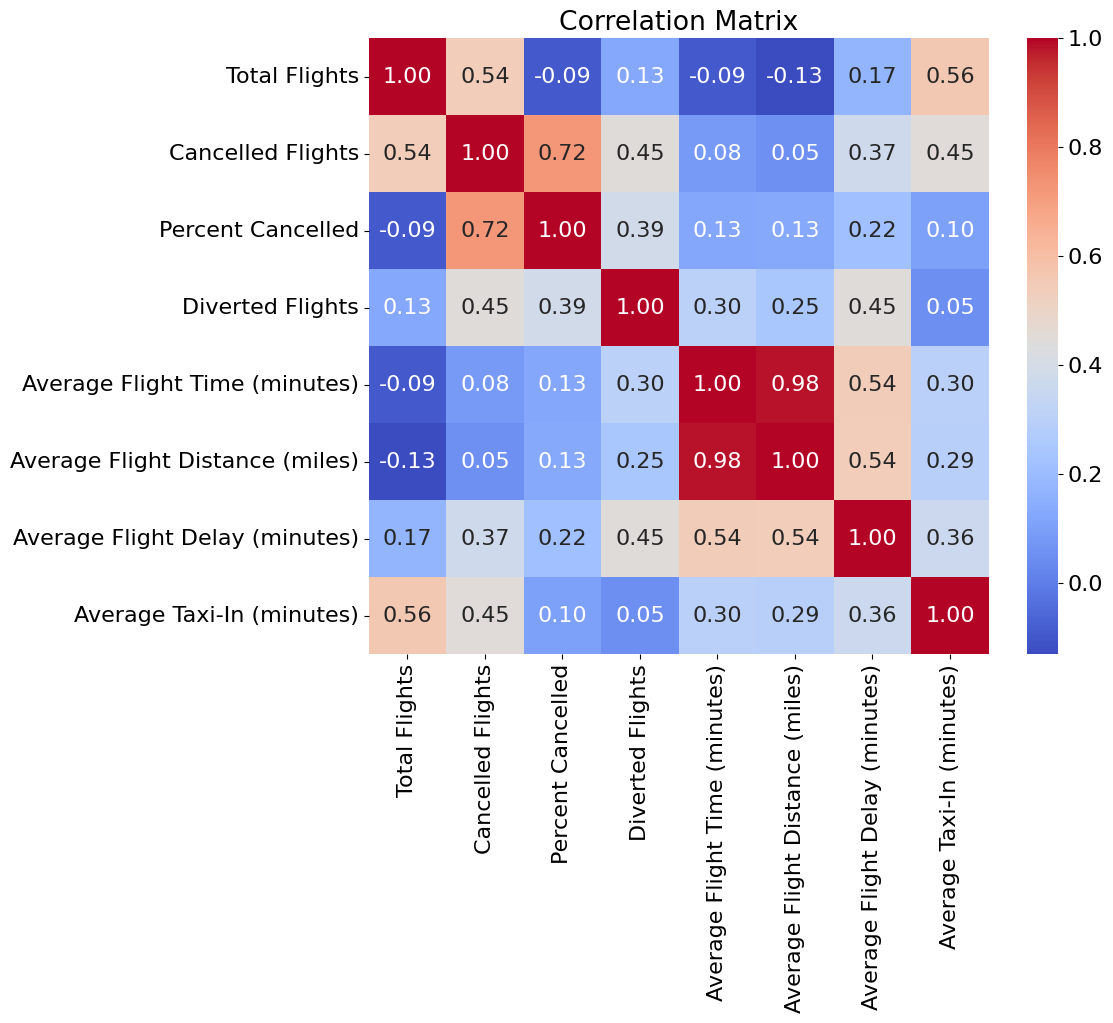

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_corr(df):
    plt.figure(figsize=(10, 8))
    sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
    plt.title('Correlation Matrix')
    plt.show()

df2 = summary_table_dest[summary_table_dest['Total Flights']>1000]

plot_corr(df2)

plt.show()

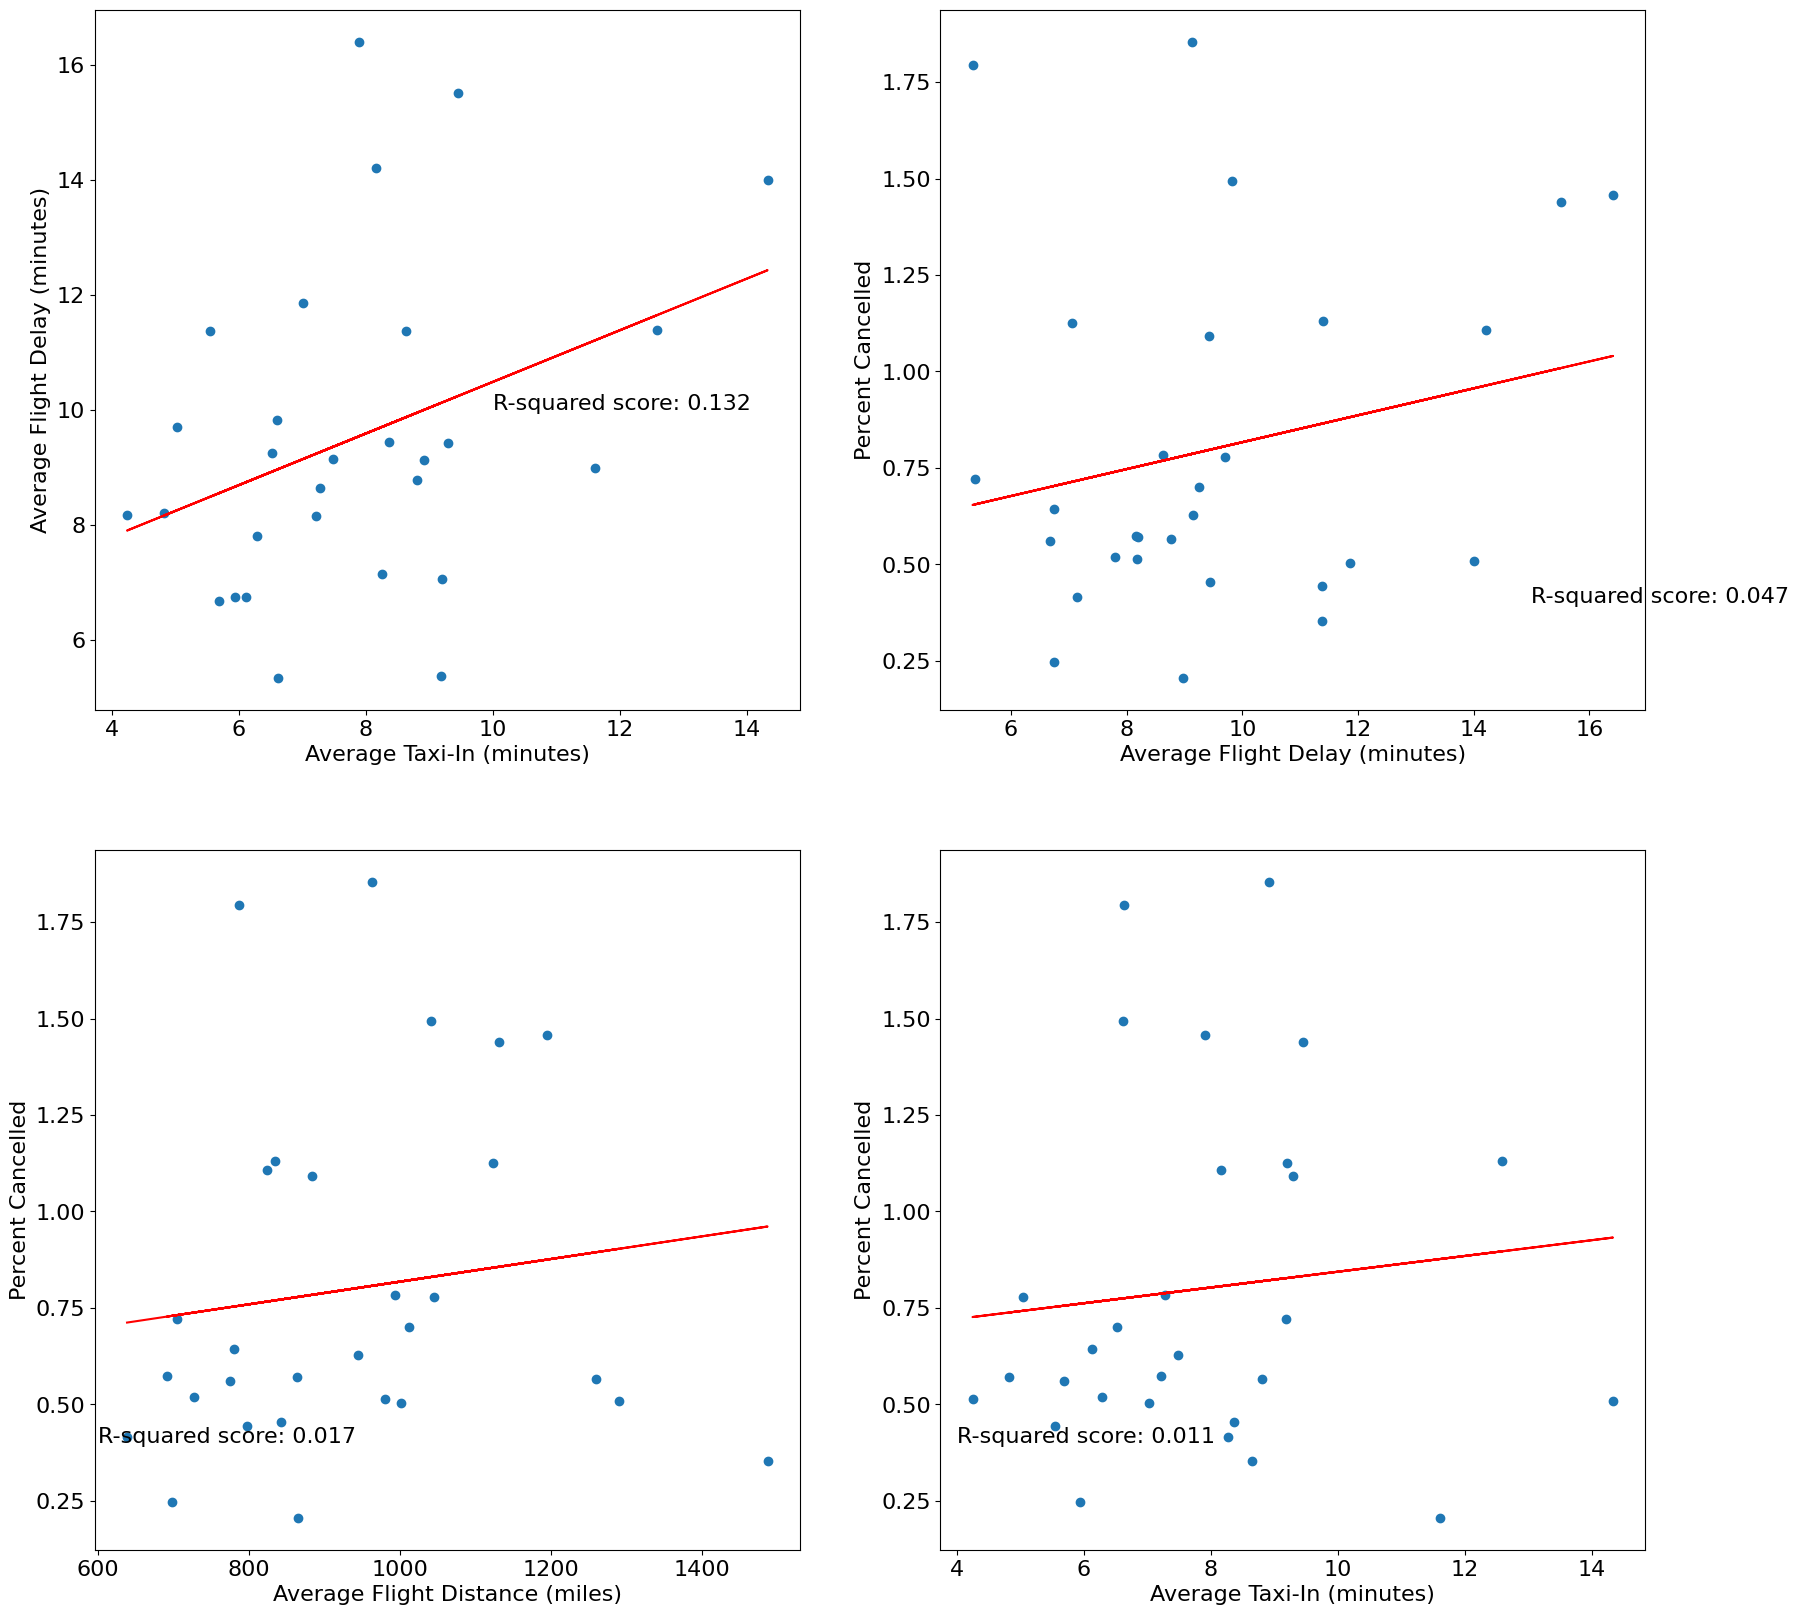

In [ ]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

#df2 = summary_table_dest[summary_table_dest['Cancelled Flights']>1]

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(20, 20))

X = df2['Average Taxi-In (minutes)']
y = df2['Average Flight Delay (minutes)']
ax1.scatter(X, y)

X = X.values.reshape(-1,1)

linreg = LinearRegression().fit(X, y)
ax1.plot(X, linreg.coef_ * X + linreg.intercept_, 'r-')
ax1.text(10,10,'R-squared score: {:.3f}'
     .format(linreg.score(X, y)))
ax1.set_xlabel('Average Taxi-In (minutes)')
ax1.set_ylabel('Average Flight Delay (minutes)')

####################################################################################

X = df2['Average Flight Delay (minutes)']
y = df2['Percent Cancelled']
ax2.scatter(X, y)

X = X.values.reshape(-1,1)

linreg = LinearRegression().fit(X, y)
ax2.plot(X, linreg.coef_ * X + linreg.intercept_, 'r-')
ax2.text(15,0.4,'R-squared score: {:.3f}'
     .format(linreg.score(X, y)))
ax2.set_xlabel('Average Flight Delay (minutes)')
ax2.set_ylabel('Percent Cancelled')

####################################################################################

X = df2['Average Flight Distance (miles)']
y = df2['Percent Cancelled']
ax3.scatter(X, y)

X = X.values.reshape(-1,1)

linreg = LinearRegression().fit(X, y)
ax3.plot(X, linreg.coef_ * X + linreg.intercept_, 'r-')
ax3.text(600,0.4,'R-squared score: {:.3f}'
     .format(linreg.score(X, y)))
ax3.set_xlabel('Average Flight Distance (miles)')
ax3.set_ylabel('Percent Cancelled')

####################################################################################

X = df2['Average Taxi-In (minutes)']
y = df2['Percent Cancelled']
ax4.scatter(X, y)

X = X.values.reshape(-1,1)

linreg = LinearRegression().fit(X, y)
ax4.plot(X, linreg.coef_ * X + linreg.intercept_, 'r-')
ax4.text(4,0.4,'R-squared score: {:.3f}'
     .format(linreg.score(X, y)))
ax4.set_xlabel('Average Taxi-In (minutes)')
ax4.set_ylabel('Percent Cancelled')

plt.show()

In [ ]:
df['Carrier mean delay'] = df['total_delay'].groupby(df['UNIQUE_CARRIER']).transform('mean')
df['Carrier mean distance'] = df['DISTANCE'].groupby(df['UNIQUE_CARRIER']).transform('mean')
df['Carrier cancellations'] = df['CANCELLED'].groupby(df['UNIQUE_CARRIER']).transform('mean')
df['Origin cancellations'] = df['CANCELLED'].groupby(df['ORIGIN']).transform('mean')
df['Dest cancellations'] = df['CANCELLED'].groupby(df['DEST']).transform('mean')

df['Origin TaxiOut'] = df['TAXI_OUT'].groupby(df['ORIGIN']).transform('mean')
df['Origin Delay'] = df['total_delay'].groupby(df['ORIGIN']).transform('mean')

df['ORIGIN'] = df['ORIGIN'].astype('category').cat.codes
df['DEST'] = df['DEST'].astype('category').cat.codes
df['CANCELLATION_CODE'] = df['CANCELLATION_CODE'].astype('category').cat.codes
df.fillna(0, inplace=True)

#print(len(df))

# X = df[['Month', 'DayofMonth', 'DayOfWeek', 'CRSDepTime', 'Origin', 'Dest', 'Distance', 'Carrier mean distance',
#         'total_delay', 'TaxiOut']]
# X = df[['Month', 'DayofMonth', 'DayOfWeek', 'CRSDepTime', 'Origin', 'Dest', 'Distance', 'Carrier mean distance',
#        'Carrier cancellations', 'Origin cancellations', 'Dest cancellations']]
# X = df[['Month', 'DayofMonth', 'DayOfWeek', 'CRSDepTime']]
X = df[['MONTH', 'DAY_OF_MONTH', 'DAY_OF_WEEK', 'CRS_DEP_TIME', 'ORIGIN', 'DEST', 'DISTANCE', 'Carrier mean distance',
        'Origin Delay', 'Origin TaxiOut']]
y = df['CANCELLED']


# The code below was used for intermediate parameter searches as the full set was too big 
# and took too long to train each set of parameters

# df1 = df.sample(n=50000, random_state = 47)
# X = df1[['Month', 'DayofMonth', 'DayOfWeek', 'CRSDepTime', 'Origin', 'Dest', 'Distance', 'Carrier mean distance',
#         'Origin Delay', 'Origin TaxiOut']]
# y = df1['Cancelled']


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
# we must apply the scaling to the test set that we computed for the training set
X_test_scaled = scaler.transform(X_test)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

clf = RandomForestClassifier(n_estimators=50, random_state=47).fit(X_train, y_train)

sum(y_test)
clf.score(X_test, y_test)

y_predicted = clf.predict(X_test)
confusion = confusion_matrix(y_test, y_predicted)
confusion
sum(y_predicted)

print('Recall: {:.3f}'.format(recall_score(y_test, y_predicted)))
print('Precision: {:.3f}'.format(precision_score(y_test, y_predicted)))
print('Accuracy: {:.3f}'.format(accuracy_score(y_test, y_predicted)))
print('F1: {:.3f}'.format(f1_score(y_test, y_predicted)))
confusion = confusion_matrix(y_test, y_predicted)
print(confusion)
print('Feature importances: {}'.format(clf.feature_importances_))

Recall: 0.242
Precision: 0.799
Accuracy: 0.990
F1: 0.371
[[1391434    1003]
 [  12559    3999]]
Feature importances: [0.07395719 0.2160102  0.09754438 0.24772502 0.04253967 0.09689315
 0.09887385 0.03530683 0.04518688 0.04596282]


In [ ]:
import numpy as np

np.set_printoptions(formatter={'float': lambda x: "{0:0.3f}".format(x)})
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

clf = SVC(kernel='rbf')
#grid_values = {'gamma': [0.001, 0.01, 0.05, 0.1, 1, 10, 100], 'C': [0.01, 0.1, 1, 10, 100]}
#grid_values = {'gamma': [0.1, 1, 10, 100], 'C': [100, 300, 1000, 3000]}
grid_values = {'gamma': [3, 6, 10], 'C': [100, 300, 1000, 3000]}

grid_clf = GridSearchCV(clf, param_grid = grid_values, scoring = 'recall')
grid_clf.fit(X_train_scaled, y_train)
grid_clf.cv_results_['mean_test_score'].reshape(4,3)

array([[0.061, 0.137, 0.144],
       [0.115, 0.153, 0.146],
       [0.139, 0.162, 0.146],
       [0.155, 0.162, 0.146]])

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
np.set_printoptions(formatter={'float': lambda x: "{0:0.3f}".format(x)})

svm = SVC(kernel='rbf', C=1000, gamma=6, random_state=47).fit(X_train_scaled, y_train)
y_pred = svm.predict(X_test_scaled)

print('Recall: {:.3f}'.format(recall_score(y_test, y_pred)))
print('Precision: {:.3f}'.format(precision_score(y_test, y_pred)))
print('Accuracy: {:.3f}'.format(accuracy_score(y_test, y_pred)))
print('F1: {:.3f}'.format(f1_score(y_test, y_pred)))
confusion = confusion_matrix(y_test, y_pred)
print(confusion)

y_scores = svm.decision_function(X_test_scaled)
y_score_list = list(zip(y_test[0:20], y_scores[0:20]))

Recall: 0.142
Precision: 0.122
Accuracy: 0.985
F1: 0.131
[[24019   202]
 [  169    28]]


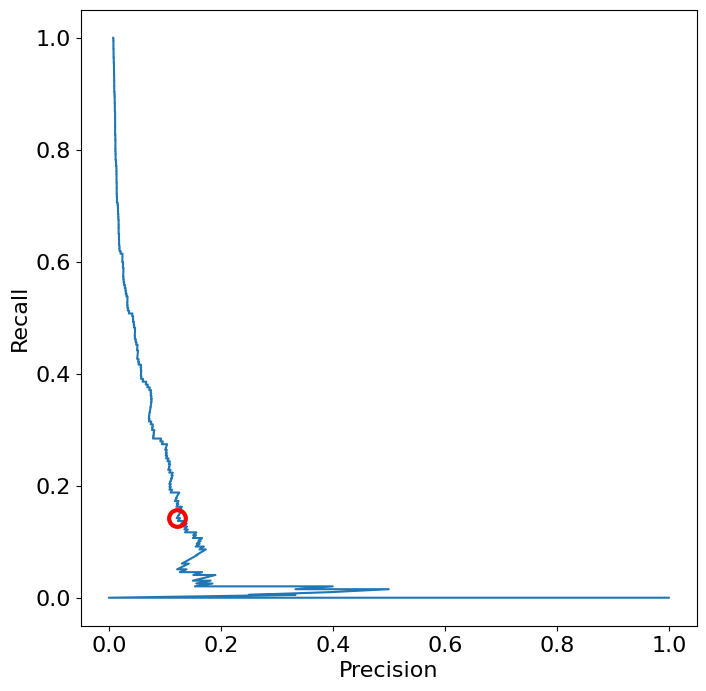

In [ ]:
from sklearn.metrics import precision_recall_curve, roc_curve, auc

precision, recall, thresholds = precision_recall_curve(y_test, y_scores)
closest_zero = np.argmin(np.abs(thresholds))
closest_zero_p = precision[closest_zero]
closest_zero_r = recall[closest_zero]

fig, ax1= plt.subplots(figsize=(8,8))
#plt.figure(figsize=(8,8))
ax1.plot(precision, recall, label='Precision-Recall Curve')
ax1.plot(closest_zero_p, closest_zero_r, 'o', markersize = 12, fillstyle = 'none', c='r', mew=3)
ax1.set_xlabel('Precision', fontsize=16)
ax1.set_ylabel('Recall', fontsize=16)
ax1.set_aspect('equal')
plt.show()

AUC: 0.753


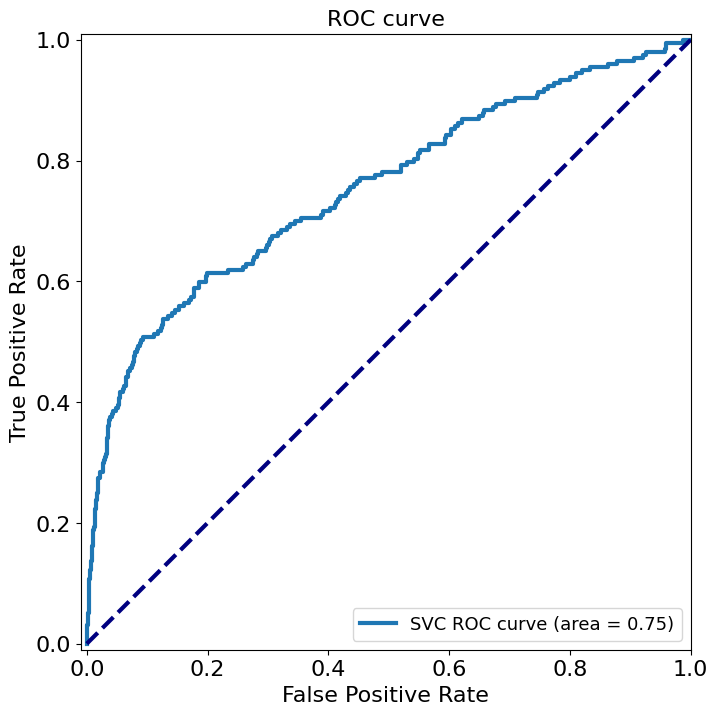

In [ ]:
fpr, tpr, _ = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)
print('AUC: {:.3f}'.format(roc_auc))

fig, ax1= plt.subplots(figsize=(8,8))
#plt.figure(figsize=(8,8))
ax1.set_xlim([-0.01, 1.00])
ax1.set_ylim([-0.01, 1.01])
ax1.plot(fpr, tpr, lw=3, label='SVC ROC curve (area = {:0.2f})'.format(roc_auc))
ax1.set_xlabel('False Positive Rate', fontsize=16)
ax1.set_ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve', fontsize=16)
plt.legend(loc='lower right', fontsize=13)
ax1.plot([0, 1], [0, 1], color='navy', lw=3, linestyle='--')
ax1.set_aspect('equal')
plt.show()